<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Thresholding-Strategies-for-Neural-Network-Monitoring" data-toc-modified-id="Thresholding-Strategies-for-Neural-Network-Monitoring-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Thresholding Strategies for Neural Network Monitoring</a></span><ul class="toc-item"><li><span><a href="#Experiments-setting" data-toc-modified-id="Experiments-setting-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Experiments setting</a></span><ul class="toc-item"><li><span><a href="#Construction-of-threshold-optimization-and-evaluation-set" data-toc-modified-id="Construction-of-threshold-optimization-and-evaluation-set-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Construction of threshold optimization and evaluation set</a></span></li><li><span><a href="#Computing-optimal-threshold" data-toc-modified-id="Computing-optimal-threshold-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Computing optimal threshold</a></span></li><li><span><a href="#Upsampling-naive" data-toc-modified-id="Upsampling-naive-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Upsampling naive</a></span></li></ul></li><li><span><a href="#RESULTS" data-toc-modified-id="RESULTS-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>RESULTS</a></span><ul class="toc-item"><li><span><a href="#All" data-toc-modified-id="All-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>All</a></span></li><li><span><a href="#PROTOCOL-OF-COMPARISON" data-toc-modified-id="PROTOCOL-OF-COMPARISON-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>PROTOCOL OF COMPARISON</a></span></li><li><span><a href="#Choosing-Focus-Metric-Optimization:-Gmean" data-toc-modified-id="Choosing-Focus-Metric-Optimization:-Gmean-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Choosing Focus Metric Optimization: Gmean</a></span><ul class="toc-item"><li><span><a href="#Compare-F1-upsampling-vs-F1-original" data-toc-modified-id="Compare-F1-upsampling-vs-F1-original-1.2.3.1"><span class="toc-item-num">1.2.3.1&nbsp;&nbsp;</span>Compare F1 upsampling vs F1 original</a></span></li><li><span><a href="#Compare-F1-without-upsampling-and-Gmean" data-toc-modified-id="Compare-F1-without-upsampling-and-Gmean-1.2.3.2"><span class="toc-item-num">1.2.3.2&nbsp;&nbsp;</span>Compare F1 without upsampling and Gmean</a></span></li><li><span><a href="#Compare-F1-upsample-and-Gmean" data-toc-modified-id="Compare-F1-upsample-and-Gmean-1.2.3.3"><span class="toc-item-num">1.2.3.3&nbsp;&nbsp;</span>Compare F1 upsample and Gmean</a></span></li><li><span><a href="#Compare-95TNR-upsample-and-Gmean" data-toc-modified-id="Compare-95TNR-upsample-and-Gmean-1.2.3.4"><span class="toc-item-num">1.2.3.4&nbsp;&nbsp;</span>Compare 95TNR upsample and Gmean</a></span></li></ul></li><li><span><a href="#Friedman-test-and-Nemenyi-post-hoc-test" data-toc-modified-id="Friedman-test-and-Nemenyi-post-hoc-test-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Friedman test and Nemenyi post-hoc test</a></span></li><li><span><a href="#Final-Results" data-toc-modified-id="Final-Results-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Final Results</a></span></li></ul></li><li><span><a href="#DISCUSSION" data-toc-modified-id="DISCUSSION-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>DISCUSSION</a></span><ul class="toc-item"><li><span><a href="#Intuition-with-a-fixed-case-example" data-toc-modified-id="Intuition-with-a-fixed-case-example-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Intuition with a fixed case example</a></span><ul class="toc-item"><li><span><a href="#Choosing-the-case-to-analyze" data-toc-modified-id="Choosing-the-case-to-analyze-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Choosing the case to analyze</a></span></li><li><span><a href="#Analysis-for-intuition" data-toc-modified-id="Analysis-for-intuition-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Analysis for intuition</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Can we Defend Against the Unknown? An Empirical Study About Threshold Selection for Neural Network Monitoring


**Abstract** 

- With the increasing deployment of neural networks in critical systems, runtime monitoring plays a critical role in rejecting unsafe predictions during inference.

- Various techniques have emerged to establish rejection scores that aim to maximize the separability between the distributions of safe and unsafe predictions. In most works, the efficacy of these approaches is evaluated using threshold-agnostic metrics, such as the area under the receiver operating characteristic curve.

- However, in real-world applications, the effectiveness of a monitor also requires identifying a good threshold to transform these scores into meaningful binary decisions. Despite the pivotal importance of threshold optimization in practice, this problem has received little to no attention in the literature. 

- In this work, we tackle this very question by comparing empirically different strategies to construct monitoring threshold optimization datasets, by combining different sources of in- and out-of-distribution samples. 

- In this work, we address this question by comparing **four strategies for constructing threshold optimization** datasets, each reflecting a different assumption about the data available for threshold tuning. We present rigorous experiments on various image datasets to investigate: 
    1. The effectiveness of monitors in handling unforeseen threats, which are not available during threshold adjustments. 
    2. Whether integrating generic threats into the threshold optimization scheme can enhance the robustness of monitors.

In [ ]:
%pwd
%cd ..

In [ ]:
# Code from working directory 
from dataset import Dataset, mean_transform, std_transform
from feature_extractor import FeatureExtractor
from monitors import OutsideTheBoxMonitor, GaussianMixtureMonitor, MaxSoftmaxProbabilityMonitor, MaxLogitMonitor, EnergyMonitor, ReActMonitor, MahalanobisMonitor
from evaluation import Evaluator, get_optimal_threshold_f1, get_average_precision_oms, get_auroc_oms, get_tnr_frac_tpr_oms

# Libraries
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import augly.image as imaugs
import pandas as pd
import tqdm as tq
import random
import copy
import os

# Utility functions of sklearn 
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, average_precision_score, roc_curve, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score

from sklearn.utils import resample

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Experiments setting

As of experiments, we  will establish **4 different strategies/cases of constructing threshold optimization set** and design **one threshold evaluation set** for these strategies. For each strategy, we will choose an optimal threshold by three different ways based on the monitor optimization set. This threshold is then used to evaluate the performance on the threshold evaluation set. 

To encapsulate varying **In-Distribution (ID)** scenarios, we use **three** standalone image classification datasets: CIFAR10, CIFAR100 (Krizhevsky et al., 2009) and SVHN (Netzer et al., 2011).

For each ID dataset, we use **2 distinct neural network architectures** – DenseNet and ResNet – with weights taken from Lee et al. (2018).

For each ID dataset and architecture pair, we implement **4 distinct monitoring techniques**.
- 2 feature-based approaches (We derive the feature representation from the final layer preceding classification and do not apply input pre-processing)
    - Mahalanobis (Maha) (Lee et al., 2018)  
    - Outside-the-Box (OtB) (Henzinger et al., 2020) (number of clusters fixed to 3 and covariance constraint='full')
- 2 logit-based methods
    - Max Softmax Probability (MSP) (Hendrycks & Gimpel, 2016) 
    - Energy (Ene) (Liu et al., 2020) (Temperature = 1)  
    
These settings result in a total of **24 monitors** evaluated.

Each ID set is paired with **nine unique threat sets** to assess the monitors under varied circumstances. 

- 3 Novelty: To make OOD sets categories not overlapping w.r.t the ID set, we use CIFAR100, SVHN, and LSUN (Yu et al. 2015) as novel data for CIFAR10; CIFAR10, SVHN, and LSUN for CIFAR 100; and CIFAR10, LSUN, and Tiny-ImageNet (subset of ImageNet (Deng et al. 2009)) for SVHN.

- 3 Covariate Shift: Three different image transformation techniques from the AugLy library (Papakipos and Bitton 2022) on the ID set are used : Brightness (factor=3), Blur (radius=2), and Pixelization (ratio=0.5).

- 3 Adversarial Attacks: adversarial images of the ID set generated by three attacks from Torchattacks (Kim 2020) with default parameters: : FGSM, DeepFool, and PGD.

Components of threshold optimization sets and threshold evaluation set are given in the table below (more information in the paper).

| Strategy               |Strategy| In-distribution | In-distribution| Target Threat |Target Threat| Other generic threats |
| ---------------------- | ------ | --------------- | ----           | ------------- | ----        | --------------------- |
|                        |        | Set1            | Set 2          | Set 1         | Set 2       |                       |
| Threshold Optimization | ID     | yes             |                |               |             |                       |
| Threshold Optimization | ID+T   | yes             |                | yes           |             |                       |
| Threshold Optimization | ID+O   | yes             |                |               |             | yes                   |
| Threshold Optimization | ID+T+O | yes             |                | yes           |             | yes                   |
| Threshold Evaluation   |        |                 | yes            |               | yes         |                       |

For each ID dataset--monitor pair, we cycle through the nine threats, with each serving once as the target Threat (T), resulting in nine unique outcomes for each strategy. While assessing a chosen target threat, the remaining eight threats serve as Other Generic Threats (O). 

The test split of the classifier’s training dataset serves as the In-Distribution (ID) dataset. Then, both the ID set and the T set are randomly split in half, so that the threshold evaluation set and the four threshold optimization sets can be constructed. 

For the optimization set, we introduce four strategies/cases to construct it:  (Note that the case notation is only in the supplementary code, the corresponding strategy notation is the one discussed in the paper).
- Strategy ID - Case 0: only the first part of the ID dataset
- Strategy ID+T - Case 1: the first part of the ID dataset + <font color="red">the first part of the Target Threat </font>
- Strategy ID+T+O - Case 2: the first part of the ID dataset + <font color="red">the first part of the Target Threat </font> +  <font color="blue"> 8 remaining generic threat datasets </font>
- Strategy ID+O- Case 3: the first part of the ID dataset +  <font color="blue">8 remaining generic threat datasets </font>


As of **example**, we will take CIFAR10 as the ID dataset, the Target Threat CIFAR100-Novelty. In this setting, we have:
* evaluation set: 50% CIFAR10 + 50% CIFAR100

* optimization set
    - Case 0 (strategy ID): 
        + optimization: 50% CIFAR10
    - Case 1 (strategy ID+T): 
        + optimization: 50% CIFAR10 + <font color="red">50% CIFAR100</font>
    - Case 2 (strategy ID+T+O): 
        + optimization: 50% CIFAR10 + <font color="red">50% CIFAR100</font> + <font color="blue"> SVHN+LSUN+Brightness(CIFAR10)+Blur(CIFAR10)+Pixelization(CIFAR10)+FGSM(CIFAR10)+DeepFool(CIFAR10)+PGD(CIFAR10)</font>
    - Case 3 (strategy ID+O): 
        + optimization: 50% CIFAR10 + <font color="blue">SVHN+LSUN+Brightness(CIFAR10)+Blur(CIFAR10)+Pixelization(CIFAR10)+FGSM(CIFAR10)+DeepFool(CIFAR10)+PGD(CIFAR10)</font>


**To note that we will have the same evaluation set in all 4 cases/strategies.**


**For each of these threshold optimization sets, we will choose the optimal threshold by maximizing the effectiveness measure on threshold optimization set, then evaluate this threshold on the threshold evaluation set by measuring 5 evaluation metrics (F1, g-mean, recall, precision and specificity).**

We will look at **threshold optimization** with two proposed effectiveness measure to optimize, and one typical way to fix the threshold in the literature:   
- highest F1 score in optimization set, computed with precision-recall curve
- highest g-mean in optimization set, computed with ROC curve
- threhsold @95TNR, such that TNR on optimization set = 0.95

From this set up, we want to address **two main research questions**:
1. How critical is prior knowledge about the target threat?
- by comparing strategy ID against ID+T
- by comparing strategy ID+O against ID+T+O

2. How helpful is the inclusion of generic threats data?
- by comparing strategy ID against ID+O
- by comparing strategy ID+T against ID+T+O


In [3]:
fig_title_hide = True # Set True if not plotting titles for article figures, Set False for comprehensive title

In [4]:
batch_size = 100
device_name = 'cuda:0' if torch.cuda.is_available() else 'cpu'
path_task = os.getcwd()

path_image = path_task + 'image/' # Folder to save image 
path_csv_results = path_task + 'results_csv/' # Folder to save experiments csv

if not os.path.exists(path_image):
    os.makedirs(path_image)
    print("new directory to save image is created!")
if not os.path.exists(path_csv_results):
    os.makedirs(path_csv_results)
    print("new directory to save results csv is created!")

### Construction of threshold optimization and evaluation set

We import the class ThresholdOptDataset to construct 4 threshold optimizations sets and 1 threshold evaluation set for each experience (ID set-Architecture-MonitoringAprroach-TargetThreat-OptimizationMetric-strategyConstructing). The construction aims principally to outputs a vector of monitor score for each input data and its corresponding label in OMS (Out-of-Model-Scope) setting.

In [5]:
from thresh_strategies_dataset import ThresholdOptDataset, SEED

# Set random seed for reproducibility
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [6]:
# Example of class init and attributes

id_dataset = 'cifar100' #the in-distribution dataset
model = "densenet" #the model from which we extract features and fit the monitor
layer_id = 98 #index of last layer of model
split_ratio = 0.5 #c.f. example explained above
atk=None
cov_shift=None
ood_dataset = 'cifar10' #main OOD dataset, must be novelty if atk=None and cov_shift=None ; else must be identical to id_dataset

dataset_exp = ThresholdOptDataset(id_dataset, ood_dataset, model, layer_id, split_ratio, cov_shift, atk, batch_size, save_flag_type=True)

dataset_exp.__dict__.keys() 

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./Data\test_32x32.mat
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./Data\test_32x32.mat
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


dict_keys(['id_dataset', 'ood_dataset', 'network', 'layer_id', 'split_ratio', 'cov_shift', 'atk', 'beta', 'batch_size', 'SEED', 'device_name', '_device', 'feature_extractor', 'dataset_train', 'dataset_test', 'dataset_ood', 'other_ood_dataset', 'features_train', 'logits_train', 'softmax_train', 'pred_train', 'lab_train', 'save_flag_type', 'features_test_p1', 'features_test_p2', 'logits_test_p1', 'logits_test_p2', 'softmax_test_p1', 'softmax_test_p2', 'pred_test_p1', 'pred_test_p2', 'lab_test_p1', 'lab_test_p2', 'y_true_id_p1', 'y_true_id_p2', 'features_ood_p1', 'features_ood_p2', 'logits_ood_p1', 'logits_ood_p2', 'softmax_ood_p1', 'softmax_ood_p2', 'pred_ood_p1', 'pred_ood_p2', 'lab_ood_p1', 'lab_ood_p2', 'y_true_ood_p1', 'y_true_ood_p2', 'features_allcase_evaluation', 'logits_allcase_evaluation', 'softmax_allcase_evaluation', 'pred_allcase_evaluation', 'lab_allcase_evaluation', 'y_true_allcase_evaluation', 'features_case0_optimization', 'logits_case0_optimization', 'softmax_case0_optim

### Computing optimal threshold

Here we import functions to compute different metrics as well as to get the threshold which maximizes predefined metrics knowing ground truth.

In [7]:
from compute_optimal_threshold import get_tpr_frac_tnr_oms_new, get_specificity_score
from compute_optimal_threshold import get_optimal_threshold_f1_new, get_optimal_threshold_Gmean, get_threshold_fracTNR
from compute_optimal_threshold import compute_metrics_thresholdOpt_evaluationset

### Upsampling naive

Here we define a function for upsampling. The function should duplicating data from the minority class to achieve a positive-to-negative ratio ranging between 0.4 and 0.6.

In [8]:
from oversampling import upsampling_naive, upsampling_naive_add_flag

## RESULTS

Here we define the main function to execute all experiments. The results are stored in a dataframe and later stored in a csv file.

In [9]:
def main(split_ratio=0.5, resampling=True, type_main_ood='all'):
    """ Main function to conduct every experiments needed before final statistical analysis.
    For each model, each monitor, each id dataset, each ood dataset, each case or strategy, each optimization approach, we build 
    the corresponding dataset, fit the monitor, predict the scores, compute the optimal threshold, evaluate the threshold-dependent or threshold-agnostic metrics on optimization set and evaluation set."""
    
    # Define columns of results dataframe
    results_col = ['Monitor', 'Model', 'ID Dataset', 'OOD Dataset', 'OOD Type', 'Case', 
                   'Num optimization set samples', 'Num evaluation set samples', 
                   'Ratio Reject Optimization set Expected', 'Ratio Reject Evaluation set Expected', 
                   'Optimal approach', 'Optimal_threshold', 'Cheat threshold evaluation',
                   'Optimal score_optimization set', 'Precision_optimization', 'Recall_optimization', 'Specificity_optimization', 
                   'Optimal score_evaluation', 'Cheat score evaluation', 
                   "f1-score_evaluation", "gmean_evaluation", "youden_evaluation", 
                   'recall-score_evaluation', 'precision-score_evaluation', 'accuracy-score_evaluation', 'specificity-score_evaluation', 
                   'fpr-score_evaluation','tpr-score_evaluation', 'MCC-score_evaluation', 'Kappa-score_evaluation',
                   'AUROC-score_optimization', 'AUPR_rejectPosi-score_optimization', 'TPR@95TNR-score_optimization',
                   'AUROC-score_evaluation', 'AUPR_rejecPosi-score_evaluation', 'TPR@95TNR-score_evaluation']
    results_df =  pd.DataFrame (columns = results_col) #rows_num: 2 models, 7 monitors, 3 id dataset, 9 ood, 2 metrics, 4 cases/strategies
    
    all_models =  ["resnet", "densenet"]  
    all_layers_ids =  [[32], [98]]  

    all_id_datasets = ["cifar10", "svhn", "cifar100"]
    
    all_perturbations = ["brightness", "blur", "pixelization"]
    all_attacks = ["fgsm", "deepfool", "pgd"]
    
    all_ood_datasets = [["cifar100", "svhn", "lsun"]+ all_perturbations + all_attacks,
                        ["cifar10", "tiny_imagenet", "lsun"] + all_perturbations + all_attacks,
                        ["cifar10", "svhn", "lsun"] + all_perturbations + all_attacks]    
    
    all_monitor = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor','GaussianMixtureMonitor', \
                   'EnergyMonitor', 'ReActMonitor_MSP', 'ReActMonitor_Energy', 'MahalanobisMonitor'] # 
    
    cases = [0, 1, 2, 3]
    beta = 1
    optimize_app = [f"f{beta}", 'gmean', '95tnr'] #  [f"f{beta}", 'gmean', 'youden']

    row = 0 
    
    # Loop over all models
    for h in tq.tqdm(range(len(all_models)), position=0, desc="Main Loop", leave=True, colour='yellow', ncols=80):
        model = all_models[h]
        # Loop over all layers of the model
        for layer_id in all_layers_ids[h]:
            # Loop over all monitors
            for i in tq.tqdm(range(len(all_monitor)), position=1, desc="loop monitor", leave=True, colour='green', ncols=80):
                monitor_name = all_monitor[i]
                # Loop over all ID datasets
                for j in tq.tqdm(range(len(all_id_datasets)), position=2, desc="loop ID dataset", leave=True, colour='blue', ncols=80):
                    id_dataset = all_id_datasets[j]
                    # Loop over all OOD datasets
                    for k in tq.tqdm(range(len(all_ood_datasets[j])), position=3, desc="loop OOD dataset", leave=True, colour='red', ncols=80):
                        # Get name of main OOD dataset - Target Threat
                        ood_dataset = all_ood_datasets[j][k]

                        # Process for cases of cov shifting and adversarial attack where name of OOD dataset = name of ID dataset
                        if ood_dataset not in (all_perturbations + all_attacks):
                            cov_shift = None 
                            atk = None 
                            noise_type = f'novelty_{ood_dataset}'
                        elif ood_dataset in all_perturbations: 
                            cov_shift = ood_dataset
                            ood_dataset = id_dataset
                            atk = None
                            noise_type=cov_shift
                        else: 
                            cov_shift = None 
                            atk = ood_dataset
                            ood_dataset = id_dataset
                            noise_type = atk

                        # Construct data for 4 cases 
                        dataset_exp = ThresholdOptDataset(id_dataset, ood_dataset, model, layer_id, split_ratio, cov_shift, atk, batch_size)    
                        
                        feature_extractor = copy.deepcopy(dataset_exp.feature_extractor)

                        # Extract vector data train to fit the monitor
                        features_train = dataset_exp.features_train.copy()
                        logits_train = dataset_exp.logits_train.copy()
                        softmax_train = dataset_exp.softmax_train.copy()
                        pred_train = dataset_exp.pred_train.copy()
                        lab_train = dataset_exp.lab_train.copy()
                        
                        # Extract vector data evaluation
                        features_evaluation = dataset_exp.features_allcase_evaluation.copy()
                        logits_evaluation = dataset_exp.logits_allcase_evaluation.copy()
                        softmax_evaluation = dataset_exp.softmax_allcase_evaluation.copy()
                        pred_evaluation = dataset_exp.pred_allcase_evaluation.copy()
                        lab_evaluation = dataset_exp.lab_allcase_evaluation.copy()
                        y_true_evaluation = dataset_exp.y_true_allcase_evaluation.copy()
                        
                        # Fitting the same training set of classifier and predict the same evaluation set for 4 cases
                        if monitor_name == 'MaxSoftmaxProbabilityMonitor':
                            # Fit the monitor with optimizationing data
                            monitor = MaxSoftmaxProbabilityMonitor()
                            monitor.fit()
                            # Predict with monitor
                            scores_evaluation = monitor.predict(softmax_evaluation)

                        elif monitor_name == 'OutsideTheBoxMonitor':
                            nc=3
                            # Fit the monitor with optimizationing data
                            monitor = OutsideTheBoxMonitor(id_dataset, model, layer_id, n_clusters=nc, is_cv=True)
                            monitor.fit(features_train[0], pred_train, lab_train, save=True)
                            # Predict with monitor
                            scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation) * (-1) #convention 
                        elif monitor_name == 'GaussianMixtureMonitor':
                            nc=3
                            cc="full"
                            # Fit the monitor with optimizationing data
                            monitor = GaussianMixtureMonitor(id_dataset, model, layer_id, n_components=nc,
                                                 constraint=cc, is_cv=True)
                            monitor.fit(features_train[0], pred_train, lab_train, save=True)
                            # Predict with monitor
                            scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation)
                        elif monitor_name == 'MahalanobisMonitor':
                            # Fit the monitor with optimizationing data
                            monitor = MahalanobisMonitor(id_dataset, model, layer_id)
                            monitor.fit(features_train[0], pred_train, lab_train, save=True)
                            # Predict with monitor
                            scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation)
                        elif monitor_name == 'ReActMonitor_MSP':
                            clip=0.9
                            # Fit the monitor with optimizationing data
                            monitor = ReActMonitor(quantile_value=clip)
                            monitor.fit(feature_extractor, features_train[-1])
                            # Predict with monitor
                            scores_evaluation = monitor.predict(features_evaluation[-1])
                        elif monitor_name == 'EnergyMonitor':
                            # Fit the monitor with optimizationing data
                            monitor = EnergyMonitor(temperature=1)
                            monitor.fit()
                            # Predict with monitor
                            scores_evaluation = monitor.predict(logits_evaluation)
                        elif monitor_name == 'ReActMonitor_Energy':
                            clip=0.9
                            # Fit the monitor with optimizationing data
                            monitor = ReActMonitor(quantile_value=clip)
                            monitor.fit(feature_extractor, features_train[-1])
                            # Predict with monitor
                            scores_evaluation = monitor.predict(features_evaluation[-1])
                        else: 
                            raise Exception(f"Code not contain this monitor: {monitor_name}")

                        
                        # Compute optimal threshold on optimization set with different approaches per case
                        # Loop over all approaches
                        for app in optimize_app:
                            # Loop over all cases
                            for case in cases:
                                
                                # Extract vector data optimization
                                features_optimization = dataset_exp.__dict__[f"features_case{case}_optimization"].copy()
                                logits_optimization = dataset_exp.__dict__[f"logits_case{case}_optimization"].copy()
                                softmax_optimization = dataset_exp.__dict__[f"softmax_case{case}_optimization"].copy()
                                pred_optimization = dataset_exp.__dict__[f"pred_case{case}_optimization"].copy()
                                lab_optimization = dataset_exp.__dict__[f"lab_case{case}_optimization"].copy()
                                y_true_optimization = dataset_exp.__dict__[f"y_true_case{case}_optimization"].copy()

                                
                                if resampling:
                                    # Upsampling minority class
                                    try: 
                                        features_optimization, logits_optimization, \
                                            softmax_optimization, pred_optimization, \
                                            lab_optimization, y_true_optimization =  upsampling_naive(features_optimization, logits_optimization, softmax_optimization, 
                                                                                        pred_optimization, lab_optimization, y_true_optimization 
                                                                                        )
                                    except: 
                                        lines = f"id: {id_dataset}, ood_type: {noise_type}, case {case}, app: {app}, monitor: {monitor_name}, model: {model} \n"
                                        with open('strange_behavior_upsample.txt', 'a') as f:
                                            f.write(lines)
                                        print("No upsample done, because one label found only!")
                                        print(lines)
                                        
                                # Compute ratio rejected-accepted
                                ratio_rej_optimization = np.count_nonzero(y_true_optimization)/len(y_true_optimization)
                                ratio_rej_evaluation = np.count_nonzero(y_true_evaluation)/len(y_true_evaluation)
                                
                                # Predict scores on optimization set with monitor
                                if monitor_name == 'MaxSoftmaxProbabilityMonitor':
                                    scores_optimization = monitor.predict(softmax_optimization)                                    
                                elif monitor_name == 'OutsideTheBoxMonitor':
                                    scores_optimization = monitor.predict(features_optimization[0], pred_optimization) * (-1) #convention 
                                elif monitor_name == 'GaussianMixtureMonitor':
                                    scores_optimization = monitor.predict(features_optimization[0], pred_optimization)
                                elif monitor_name == 'MahalanobisMonitor':
                                    scores_optimization = monitor.predict(features_optimization[0], pred_optimization)
                                elif monitor_name == 'ReActMonitor_MSP':
                                    scores_optimization = monitor.predict(features_optimization[-1])
                                elif monitor_name == 'EnergyMonitor':
                                    scores_optimization = monitor.predict(logits_optimization)
                                elif monitor_name == 'ReActMonitor_Energy':
                                    scores_optimization = monitor.predict(features_optimization[-1])
                                else: 
                                    raise Exception(f"Code not contain this monitor: {monitor_name}")
                                    
                                # Compute optimal threshold based on scores of monitor on optimization set
                                # print("\n" + '*'*50)
                                # print(f'...Optimization in {app} sense on optimizationing set of CASE {case}')
                                if app == f"f{beta}":
                                    #optimize threshold with fbeta
                                    threshOpt, _, _, app_opt_optimization = get_optimal_threshold_f1_new(-scores_optimization, y_true_optimization, 
                                                                                                  beta=beta, display=False) #new function
                                    threshCheatevaluation, _, _, app_cheat_evaluation = get_optimal_threshold_f1_new(-scores_evaluation, y_true_evaluation, 
                                                                                                         beta=beta, display=False) #new function
                                elif app == 'gmean':
                                    #optimize threshold with gmean
                                    threshOpt, _, _, app_opt_optimization = get_optimal_threshold_Gmean(-scores_optimization, y_true_optimization, display=False) #new function
                                    threshCheatevaluation, _, _, app_cheat_evaluation = get_optimal_threshold_Gmean(-scores_evaluation, y_true_evaluation, display=False) #new function
                                elif app == 'youden': #Youden opt same as gmean opt
                                    #optimize threshold with youden 
                                    threshOpt, _, _, app_opt_optimization = get_optimal_threshold_YoudenJstat(-scores_optimization, y_true_optimization, display=False) #new function
                                    threshCheatevaluation, _, _, app_cheat_evaluation = get_optimal_threshold_YoudenJstat(-scores_evaluation, y_true_evaluation, display=False) #new function
                                elif app == f"f{beta}_C":
                                    #optimize threshold with fbeta with constraint
                                    threshOpt, _, _, app_opt_optimization = get_optimal_threshold_f1_new(-scores_optimization, y_true_optimization, 
                                                                                                  beta=beta, constraint=True, display=False) #new function
                                    threshCheatevaluation, _, _, app_cheat_evaluation = get_optimal_threshold_f1_new(-scores_evaluation, y_true_evaluation, 
                                                                                                         beta=beta, constraint=True, display=False) #new function
                                elif app == 'gmean_C':
                                    #optimize threshold with gmean
                                    threshOpt, _, _, app_opt_optimization = get_optimal_threshold_Gmean(-scores_optimization, y_true_optimization, constraint=True, display=False) #new function
                                    threshCheatevaluation, _, _, app_cheat_evaluation = get_optimal_threshold_Gmean(-scores_evaluation, y_true_evaluation, constraint=True, display=False) #new function
                                elif app == 'MCC':
                                    #optimize threshold with MCC
                                    threshOpt, app_opt_optimization = get_optimal_threshold_MCC(-scores_optimization, y_true_optimization, display=False) #new function
                                    threshCheatevaluation, app_cheat_evaluation = get_optimal_threshold_MCC(-scores_evaluation, y_true_evaluation, display=False) #new function
                                elif app == 'kappa':
                                    #optimize threshold with Cohen Kappa
                                    threshOpt, app_opt_optimization = get_optimal_threshold_kappa(-scores_optimization, y_true_optimization, display=False) #new function
                                    threshCheatevaluation, app_cheat_evaluation = get_optimal_threshold_kappa(-scores_evaluation, y_true_evaluation, display=False) #new function

                                elif app == '95tnr':
                                    #fix threshold to have TNR=0.95
                                    threshOpt = get_threshold_fracTNR(-scores_optimization, y_true_optimization, display=False)
                                    threshCheatevaluation = get_threshold_fracTNR(-scores_evaluation, y_true_evaluation, display=False)
                                    app_opt_optimization, app_cheat_evaluation = 0, 0
                                
                                else: 
                                    raise Exception()

                                # Evaluating threshold-dependent metrics on optimization set
                                y_pred_optimization = -scores_optimization >= threshOpt
                                recall_optimization = recall_score(y_true_optimization, y_pred_optimization)
                                precision_optimization = precision_score(y_true_optimization, y_pred_optimization)
                                specificity_optimization = get_specificity_score(y_true_optimization, y_pred_optimization)
                                
                                
                                # One hot encoding prediction probabilities with threshold computed
                                y_pred_evaluation = -scores_evaluation >= threshOpt

                                # Evaluating threshold-dependent metrics on evaluation set
                                fbeta, precision, recall, accuracy, specificity,  gmean, youden = compute_metrics_thresholdOpt_evaluationset(y_true_evaluation, 
                                                                                y_pred_evaluation, 
                                                                                threshOpt, beta=beta, display=False) 
                                fpr = 1-specificity
                                tpr = recall

                                f1 = fbeta_score(y_true_evaluation, y_pred_evaluation, beta=1)
                                metrics_app_evaluation = fbeta*(app==f"f{beta}") + gmean*(app=="gmean") + youden*(app=="youden")
                                mcc = matthews_corrcoef(y_true_evaluation, y_pred_evaluation)
                                kappa = cohen_kappa_score(y_true_evaluation, y_pred_evaluation)
                                
                                aupr_rejectPosi_eval = average_precision_score(y_true_evaluation, -scores_evaluation)
                                auroc_eval = roc_auc_score(y_true_evaluation, -scores_evaluation)
                                tnr95tpr_eval = get_tpr_frac_tnr_oms_new(-scores_evaluation, y_true_evaluation, frac=0.95)
                                
                                aupr_rejectPosi_optimization = average_precision_score(y_true_optimization, -scores_optimization)
                                auroc_optimization = roc_auc_score(y_true_optimization, -scores_optimization)
                                tnr95tpr_optimization = get_tpr_frac_tnr_oms_new(-scores_optimization, y_true_optimization, frac=0.95)


                                # Fill result dataframe
                                results_df.loc[row, :] = [monitor_name, model, id_dataset, ood_dataset, noise_type, f"Case{case}", 
                                                          len(y_true_optimization), len(y_true_evaluation), 
                                                        ratio_rej_optimization, ratio_rej_evaluation,
                                                        app, threshOpt, threshCheatevaluation, app_opt_optimization, 
                                                        precision_optimization, recall_optimization, specificity_optimization,
                                                        metrics_app_evaluation, app_cheat_evaluation, 
                                                        f1,gmean, youden, recall, precision, accuracy, specificity, 
                                                        fpr, tpr, mcc, kappa, 
                                                        auroc_optimization, aupr_rejectPosi_optimization, tnr95tpr_optimization, 
                                                        auroc_eval, aupr_rejectPosi_eval, tnr95tpr_eval]
                                row += 1            
    return results_df

In [10]:
def _check_result_table(df):
    
    #check missing values 
    assert df.isnull().sum().sum() == 0

def _formatting_numericcol_table(df):

    #column names to convert to numeric
    cols  = ['Optimal_threshold', 'Cheat threshold evaluation',
                   'Optimal score_optimization set', 'Optimal score_evaluation', 'Cheat score evaluation', "f1-score_evaluation",  "gmean_evaluation", "youden_evaluation", 'recall-score_evaluation', 'precision-score_evaluation', 
                   'accuracy-score_evaluation', 'specificity-score_evaluation', 'fpr-score_evaluation','tpr-score_evaluation']
    df_copy = df.copy()
    df_copy[cols] = df[cols].apply(pd.to_numeric)
        
    return df_copy

In [11]:
# IF RESULTS ARE NOT GENERATED PREVIOUSLY, RUN EXPERIMENTS AND SAVE RSEULTS IN CSV FILES

if not os.path.exists(path_csv_results + 'Result-Thresh-Opt.csv'): 
    # run all experiments without resampling applied on threshold optimization set
    resampling = False #True or False
    split_ratio = 0.5 #range from 0 to 1
    type_main_ood = 'all' #values in ['all']
    results_df_all = main(split_ratio=split_ratio, resampling=resampling, type_main_ood=type_main_ood) 
    
    # Save results in csv files
    _check_result_table(results_df_all)
    results_df_all = _formatting_numericcol_table(results_df_all).round(6)

#     results_df_all.to_csv(path_csv_results + 'Result-Thresh-Opt.csv', index=False)
    print(f"...Exported csv file: Result-Thresh-Opt.csv")    

    
if not os.path.exists(path_csv_results + 'Result-Thresh-Opt_resampling.csv'): 
    # run all experiments with resampling applied on threshold optimization set
    resampling = True #True or False
    split_ratio = 0.5 #range from 0 to 1
    type_main_ood = 'all' #values in ['all']
    results_df_all = main(split_ratio=split_ratio, resampling=resampling, type_main_ood=type_main_ood) 
    
    # Save results in csv files
    _check_result_table(results_df_all)
    results_df_all = _formatting_numericcol_table(results_df_all).round(6)

    results_df_all.to_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv', index=False)
    print(f"...Exported csv file: Result-Thresh-Opt_resampling.csv")    


### All 

**Final results are stored in a dataframe with combination of:**
   
   - 3 ID datasets
   - 2 models architec (DenseNet and ResNet)
   - 7 monitoring techiques (4 will be used for analyzing)
   - 9 Threat datasets 
   - 3 ways of choosing threshold (optimize F1, g-mean and choose threshold @95TNR)
   - 4 stragies of constructing threshold optimization set


...so we have 2592 (864 for each of F1, gmean, @95TNR) rows, for each experience(row), we compute score on evaluation set (f1, gmean, youden, precision, recall, specificity), and extra informations on optimal threshold on optimization set, optimal score on optimization/evaluation, the maximum score to reach since we know the ground truth, ...

**...so in total a table of 2592 rows and multiple columns**.


### PROTOCOL OF COMPARISON

We will use the Friedman test with the corresponding post-hoc tests (in particular Nemenyi test) for comparison of more classifiers over multiple data sets. For comparison
of **four strategies (over multiple datasets configured)**, we will use the **Friedman
test and its corresponding Nemenyi post-hoc test** (Demˇsar (2006)). 

The Friedman test is a non-parametric test alternatives to the repeated-measures ANOVA test. It compares the average ranks of four types of monitors with the null-hypothesis assuming no significant difference between them. In case of rejecting the null-hypothesis, the Nemenyi post-hoc test is conducted to know which type of monitor is significant different than another type of monitor.

In next section, we will need to compare pairwisely 2 ways of choosing the threshold on the threshold optimization set. For comparison of **2 algorithms over multiple experiences**, we will use **Wilcoxon signed ranks test**. 

The Wilcoxon test is a non-parametric test able to compare statistically, the
performance of two classifiers over multiple datasets (Demˇsar (2006)).

### Comparing different effectiness measure to optimize

#### Compare F1 upsampling vs F1 original

Below, we show cases with the 4 monitoring approaches associated to the paper, without resampling data, optimized in F1-sense, having threshold=1.0, so 100% rejected, leading to a recall of 1 and specificity of 0 strictly. To us, this is not a desirable behavior. One can notice the imbalance problem in the optimization set, especially with case 2 and 3 where the reject counts majority of optimization data. The oversampling strategy is simple: Multiply all data of the minor class (either reject or accept) $N$ times so that we have a fairly balance ratio, betzeen 0.4 and 0.6. For now, the upsampling is implemented for all cases, for all 4 strategies/cases of threshold optimization set. 

Since we have 2 main ways of optimize threshold (either in f1-score sense or g-mean sense), however, gmean score is invariant to oversampling (duplicating $N$ times exact the distribution of the minor class). So we will compare firstly performance of all cases on evaluation set, with threshold optimized in optimization set in f1-sense, with and without upsampling. We choose then the better case to compare in final with scores on evaluation set if we optimize in g-mean sense. The best one (to decide when observing results) is used to make further analysis and discussions. 

To prove the bad behavior of the monitor rejecting all inputs, we show below the number of experiences with Specificity =0 (and Recall = 1). In fact, without oversampling, if we optimized threshold in f1-sense (864 experiences in total), there exists 116 cases where the threshold is extremely low and reject every data in the evaluation set. 

In [12]:
# before resampling, cases where threshold = -1.0, recall = 1, specificity = 0
results_df_all = pd.read_csv(path_csv_results + 'Result-Thresh-Opt.csv')

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor', \
                   'EnergyMonitor', 'MahalanobisMonitor']

results_df_all[results_df_all['Monitor'].isin(monitor_concerned_list)][results_df_all['Optimal approach']=='f1'][results_df_all['Specificity_optimization']==0]

,Monitor,Model,ID Dataset,OOD Dataset,OOD Type,Case,Num optimization set samples,Num evaluation set samples,Ratio Reject Optimization set Expected,Ratio Reject Evaluation set Expected,...,fpr-score_evaluation,tpr-score_evaluation,MCC-score_evaluation,Kappa-score_evaluation,AUROC-score_optimization,AUPR_rejectPosi-score_optimization,TPR@95TNR-score_optimization,AUROC-score_evaluation,AUPR_rejecPosi-score_evaluation,TPR@95TNR-score_evaluation
218,MaxSoftmaxProbabilityMonitor,resnet,cifar100,cifar10,novelty_cifar10,Case2,106032,10000,0.857760,0.613500,...,1.0,1.0,0.0,0.0,0.633630,0.899440,0.094305,0.848179,0.883371,0.362999
219,MaxSoftmaxProbabilityMonitor,resnet,cifar100,cifar10,novelty_cifar10,Case3,101032,10000,0.850721,0.613500,...,1.0,1.0,0.0,0.0,0.633646,0.894546,0.095602,0.848179,0.883371,0.362999
230,MaxSoftmaxProbabilityMonitor,resnet,cifar100,svhn,novelty_svhn,Case2,98016,18016,0.846127,0.785468,...,1.0,1.0,0.0,0.0,0.629672,0.890172,0.094883,0.865980,0.950265,0.387110
231,MaxSoftmaxProbabilityMonitor,resnet,cifar100,svhn,novelty_svhn,Case3,85000,18016,0.822565,0.785468,...,1.0,1.0,0.0,0.0,0.623784,0.871708,0.097571,0.865980,0.950265,0.387110
242,MaxSoftmaxProbabilityMonitor,resnet,cifar100,lsun,novelty_lsun,Case2,106032,10000,0.857760,0.613500,...,1.0,1.0,0.0,0.0,0.634609,0.899631,0.094107,0.837196,0.875755,0.338060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3326,EnergyMonitor,densenet,cifar10,cifar10,deepfool,Case2,106032,10000,0.788356,0.283000,...,1.0,1.0,0.0,0.0,0.665389,0.875536,0.165221,0.808378,0.562428,0.217668
3327,EnergyMonitor,densenet,cifar10,cifar10,deepfool,Case3,101032,10000,0.801617,0.283000,...,1.0,1.0,0.0,0.0,0.690564,0.894142,0.183753,0.808378,0.562428,0.217668
3337,EnergyMonitor,densenet,cifar10,cifar10,pgd,Case1,10000,10000,0.504300,0.502600,...,1.0,1.0,0.0,0.0,0.576500,0.583732,0.098354,0.577971,0.592026,0.109431
3338,EnergyMonitor,densenet,cifar10,cifar10,pgd,Case2,106032,10000,0.767646,0.502600,...,1.0,1.0,0.0,0.0,0.666115,0.860275,0.158327,0.577971,0.592026,0.109431


After oversampling, if we optimized threshold in f1-sense, there exists only 26 experiences where the threshold equals 1.0 and rejects every data in the evaluation set. The upsampling strategy reduces greatly the indesirable behavior observed. The thing to do now is to compare performance with and without doing upsampling.

In [13]:
# after resampling, cases where threshold = -1.0, recall = 1, specificity = 0
results_df_all = pd.read_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv')

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor', \
                   'EnergyMonitor', 'MahalanobisMonitor']

results_df_all[results_df_all['Monitor'].isin(monitor_concerned_list)][results_df_all['Optimal approach']=='f1'][results_df_all['Specificity_optimization']==0]

,Monitor,Model,ID Dataset,OOD Dataset,OOD Type,Case,Num optimization set samples,Num evaluation set samples,Ratio Reject Optimization set Expected,Ratio Reject Evaluation set Expected,...,fpr-score_evaluation,tpr-score_evaluation,MCC-score_evaluation,Kappa-score_evaluation,AUROC-score_optimization,AUPR_rejectPosi-score_optimization,TPR@95TNR-score_optimization,AUROC-score_evaluation,AUPR_rejecPosi-score_evaluation,TPR@95TNR-score_evaluation
313,MaxSoftmaxProbabilityMonitor,resnet,cifar100,cifar100,pgd,Case1,10000,10000,0.577400,0.587500,...,1.0,1.0,0.0,0.0,0.539204,0.643760,0.117769,0.543845,0.653273,0.105532
326,OutsideTheBoxMonitor,resnet,cifar10,cifar100,novelty_cifar100,Case2,159486,10000,0.497254,0.531400,...,1.0,1.0,0.0,0.0,0.598314,0.535823,0.046554,0.815805,0.824336,0.560030
327,OutsideTheBoxMonitor,resnet,cifar10,cifar100,novelty_cifar100,Case3,154486,10000,0.480982,0.531400,...,1.0,1.0,0.0,0.0,0.598496,0.518718,0.045219,0.815805,0.824336,0.560030
339,OutsideTheBoxMonitor,resnet,cifar10,svhn,novelty_svhn,Case3,111727,18016,0.521566,0.739898,...,1.0,1.0,0.0,0.0,0.617539,0.585070,0.065845,0.811743,0.898670,0.471118
350,OutsideTheBoxMonitor,resnet,cifar10,lsun,novelty_lsun,Case2,159486,10000,0.497254,0.531400,...,1.0,1.0,0.0,0.0,0.589101,0.526540,0.040388,0.924297,0.925827,0.774746
351,OutsideTheBoxMonitor,resnet,cifar10,lsun,novelty_lsun,Case3,154486,10000,0.480982,0.531400,...,1.0,1.0,0.0,0.0,0.578418,0.498686,0.031909,0.924297,0.925827,0.774746
362,OutsideTheBoxMonitor,resnet,cifar10,cifar10,brightness,Case2,154024,10000,0.532618,0.258300,...,1.0,1.0,0.0,0.0,0.591814,0.566119,0.045712,0.787046,0.528503,0.249710
363,OutsideTheBoxMonitor,resnet,cifar10,cifar10,brightness,Case3,164644,10000,0.484852,0.258300,...,1.0,1.0,0.0,0.0,0.581917,0.509935,0.042053,0.787046,0.528503,0.249710
374,OutsideTheBoxMonitor,resnet,cifar10,cifar10,blur,Case2,158058,10000,0.506264,0.460000,...,1.0,1.0,0.0,0.0,0.597062,0.545814,0.050001,0.899361,0.818708,0.377174
375,OutsideTheBoxMonitor,resnet,cifar10,cifar10,blur,Case3,151562,10000,0.499908,0.460000,...,1.0,1.0,0.0,0.0,0.595456,0.539126,0.051606,0.899361,0.818708,0.377174


For all experiences, we compute metrics score such as f1, gmean, recall, precision, specificity for each case, for all combinations of ID-TargetThreat corresponding to that case, with and without doing upsampling. So in final for each monitor, for each metric to compare, we have 216 scores of monitor optimized with upsampling and 216 scores of monitor optimized without upsampling. We use Wilcoxon signed ranks test to say if the first 216 scores is statistically better than the second 216 scores. 

**In order to compare A against B,**
- **Blue cells mean that A have better metric score corresponding than B**
- **Orange cells mean that A have worst metric score corresponding than B**
- **White cells mean that A equal score to B**

In [14]:
from wilcoxon_signed_rank import *

In [15]:
# result_upsampling = pd.read_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv')
# result_original = pd.read_csv(path_csv_results + 'Result-Thresh-Opt.csv') 
# monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor', \
#                    'EnergyMonitor', 'MahalanobisMonitor']

# fig_title = 'Comparison of different metrics on evaluation set, with threshold choosen in f1-sense,\n upsampling VS No upsampling'

# f = plot_compare_wilcoxon_per_optimization_method_multiplemonitors(result_upsampling, result_original,
#                                                                monitor_concerned_list=monitor_concerned_list, 
#                                                                opt_method_A='f1', opt_method_B='f1', 
#                                                                fig_title=fig_title if not fig_title_hide else None,
#                                                                 alpha=0.05)

# plt.savefig(path_image + fig_title.replace('\n', "") +'.png', bbox_inches = 'tight')


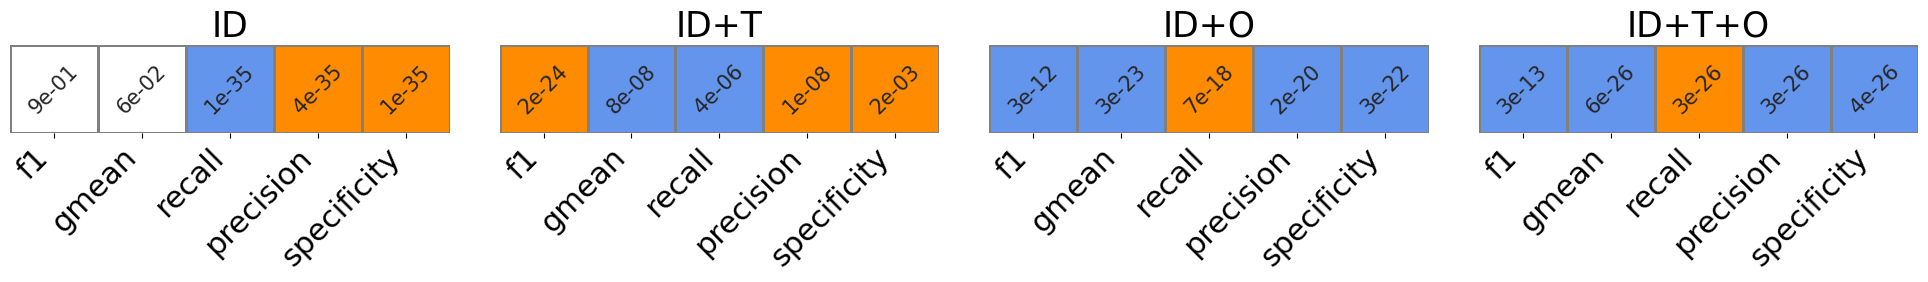

In [16]:
result_upsampling = pd.read_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv')
result_original = pd.read_csv(path_csv_results + 'Result-Thresh-Opt.csv') 

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor', \
                   'EnergyMonitor', 'MahalanobisMonitor']

fig_title = 'Comparison of evaluation metrics between threshold optimized with F1 (with oversampling) \n and F1 (without oversampling), across all experiences, divided by strategies'
f = plot_compare_wilcoxon_per_optimization_method_onemonitor(result_upsampling, result_original,
                                                           monitor_concerned=monitor_concerned_list, 
                                                           opt_method_A='f1', opt_method_B='f1', 
                                                           fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
plt.savefig(path_image + "Compare f1ups vs f1noups with all monitors combined.png", bbox_inches = 'tight')
plt.show()

#### Compare F1 without upsampling and Gmean

Here we want to compare the performance on evaluation set of monitors of which threshold is optimized in f1-sense (without upsampling) and in g-mean sense. 

**In order to compare A against B,**
- **Blue cells mean that A have better metric score corresponding than B**
- **Orange cells mean that A have worst metric score corresponding than B**
- **White cells mean that A equal score to B**

In [17]:
# fig_title = 'Comparison of different metrics on evaluation set, with threshold choosen in \nf1-sense (no upsampling) VS gmean sense'
# f = plot_compare_wilcoxon_per_optimization_method_multiplemonitors(result_original, result_original,
#                                                                monitor_concerned_list=monitor_concerned_list, 
#                                                                opt_method_A='f1', opt_method_B='gmean', 
#                                                                fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
# plt.savefig(path_image + fig_title.replace('\n', "") +'.png', bbox_inches = 'tight')


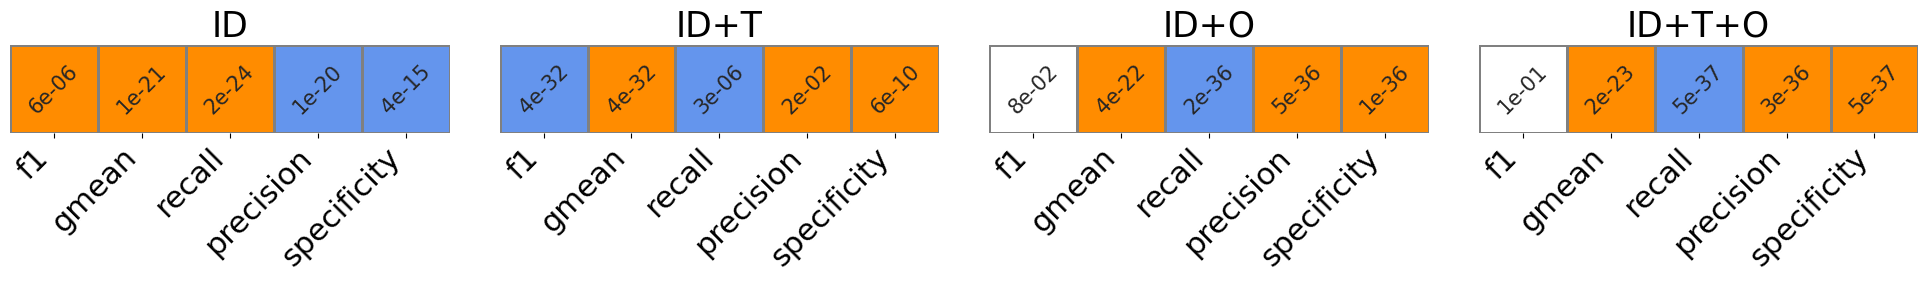

In [18]:
fig_title = 'Comparison of evaluation metrics between threshold optimized with F1 (without oversampling) \n and g-mean, across all experiences, divided by strategies'
f = plot_compare_wilcoxon_per_optimization_method_onemonitor(result_original, result_original,
                                                           monitor_concerned=monitor_concerned_list, 
                                                           opt_method_A='f1', opt_method_B='gmean', 
                                                           fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
plt.savefig(path_image + "Compare f1 without ups vs gmean with all monitors combined.png", bbox_inches = 'tight')
plt.show()

#### Compare F1 upsample and Gmean

Here we want to compare the performance on evaluation set of monitors of which threshold is optimized in f1-sense (with upsampling) and in g-mean sense. 

**In order to compare A against B,**
- **Blue cells mean that A have better metric score corresponding than B**
- **Orange cells mean that A have worst metric score corresponding than B**
- **White cells mean that A equal score to B**

In [19]:
# fig_title = 'Comparison of different metrics on evaluation set, with threshold choosen in \nf1-sense (upsampling) VS gmean sense'
# f = plot_compare_wilcoxon_per_optimization_method_multiplemonitors(result_upsampling, result_original,
#                                                                monitor_concerned_list=monitor_concerned_list, 
#                                                                opt_method_A='f1', opt_method_B='gmean', 
#                                                                fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
# plt.savefig(path_image + fig_title.replace('\n', "") +'.png', bbox_inches = 'tight')

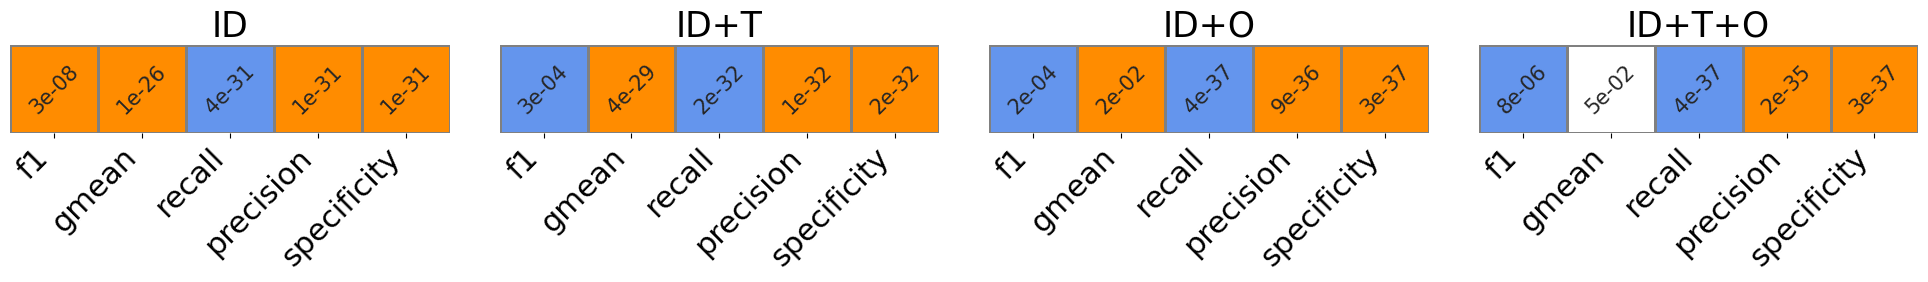

In [20]:
fig_title = 'Comparison of evaluation metrics between threshold optimized with F1 (with oversampling) \n and g-mean, across all experiences, divided by strategies'
f = plot_compare_wilcoxon_per_optimization_method_onemonitor(result_upsampling, result_original,
                                                           monitor_concerned=monitor_concerned_list, 
                                                           opt_method_A='f1', opt_method_B='gmean', 
                                                           fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
plt.savefig(path_image + "Compare f1ups vs gmean with all monitors combined.png", bbox_inches = 'tight')
plt.show()

With this comparison, we will choose to show a priori the results optimized in gmean-sense in the next sections, rather than Oversampling+F1.

#### Compare 95TNR upsample and Gmean

Here we want to compare the performance on evaluation set of monitors of which threshold is either by choosing @95TNR (with upsampling) or either by optimizing in g-mean sense. 

**In order to compare A against B,**
- **Blue cells mean that A have better metric score corresponding than B**
- **Orange cells mean that A have worst metric score corresponding than B**
- **White cells mean that A equal score to B**

In [21]:
# fig_title = 'Comparison of different metrics on evaluation set, with threshold choosen in \n@95TNR(upsampling) VS gmean sense'
# f = plot_compare_wilcoxon_per_optimization_method_multiplemonitors(result_original, result_upsampling,
#                                                                monitor_concerned_list=monitor_concerned_list, 
#                                                                opt_method_A='95tnr', opt_method_B='gmean', 
#                                                                fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
# plt.savefig(path_image + fig_title.replace('\n', "") +'.png', bbox_inches = 'tight')


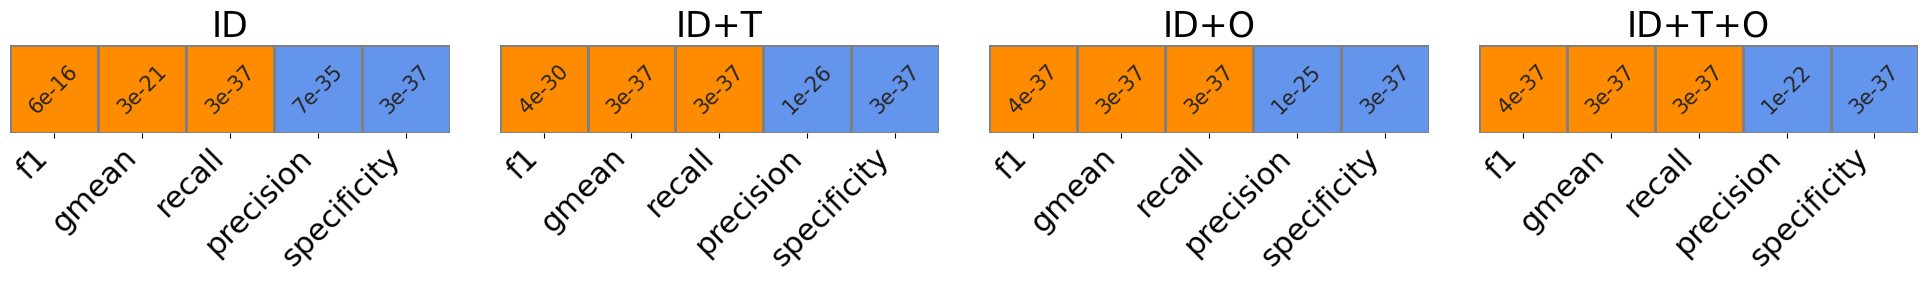

In [22]:
fig_title = 'Comparison of evaluation metrics between threshold chosen in@95TNR \n and optimized in g-mean, across all experiences, divided by strategies'
f = plot_compare_wilcoxon_per_optimization_method_onemonitor(result_upsampling, result_original,
                                                           monitor_concerned=monitor_concerned_list, 
                                                           opt_method_A='95tnr', opt_method_B='gmean', 
                                                           fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
plt.savefig(path_image + "Compare 95tnr vs gmean with all monitors combined.png", bbox_inches = 'tight')
plt.show()

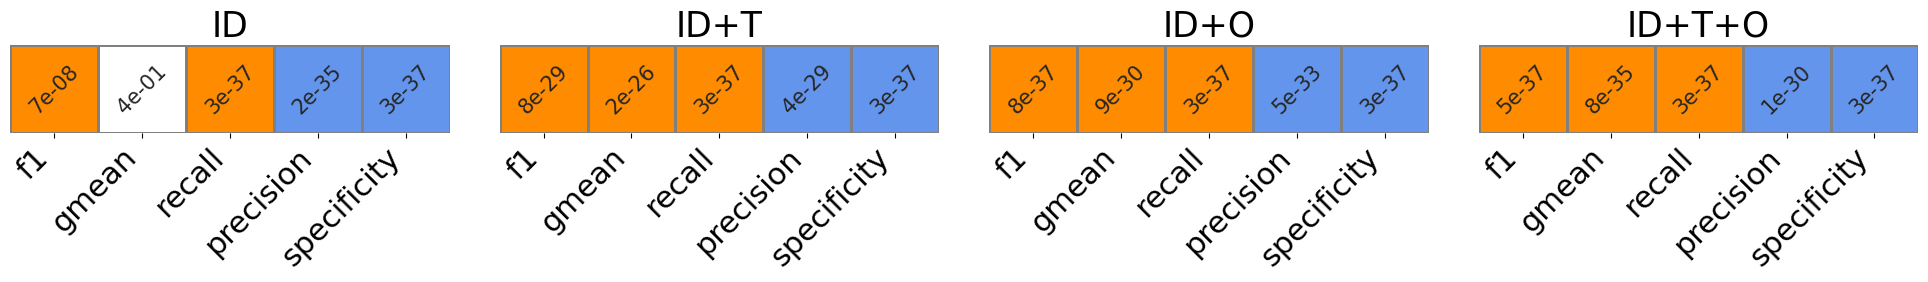

In [23]:
fig_title = monitor_concerned_list
f = plot_compare_wilcoxon_per_optimization_method_onemonitor(result_upsampling, result_upsampling,
                                                           monitor_concerned=monitor_concerned_list, 
                                                           opt_method_A='95tnr', opt_method_B='f1', 
                                                           fig_title=fig_title if not fig_title_hide else None, alpha=0.05)
plt.savefig(path_image + "Compare 95tnr vs f1 ups with all monitors combined.png", bbox_inches = 'tight')
plt.show()

From now, we focus mainly in upsampling version and gmean optimization metric (althrough g-mean is the same to 2 versions..., since it's invariant to our oversampling strategy).

In [24]:
results_df_all = pd.read_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv') 

### Friedman test and Nemenyi post-hoc test

At the level of significance α = 0.05, the Friedman test shows with minimal p-value, that there is a significant difference in performance between monitors corresponding to the four strategies of threshold selection. Nemenyi tests results are visually represented in Figure below

In [25]:
from friedman_nemenyi import *

In [26]:
# monitor_concerned_list = ['MahalanobisMonitor'] 
# app='gmean'


# results_df_all = pd.read_csv('Result-Thresh-Opt_resampling.csv')
# plot_compare_metrics_nemenyi_diagram(results_df_all, monitor_concerned_list,fig_show= not(fig_title_hide),
#                                      app=app, save=False)

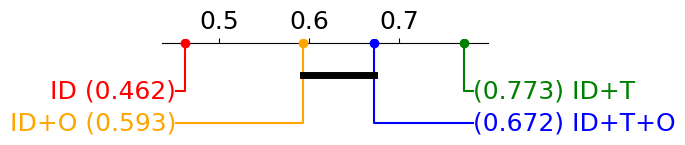

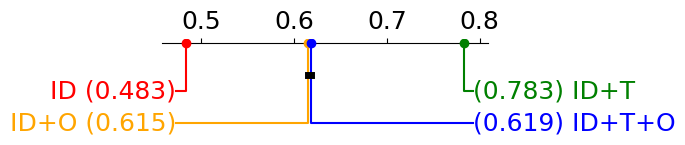

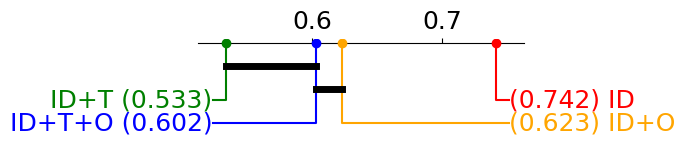

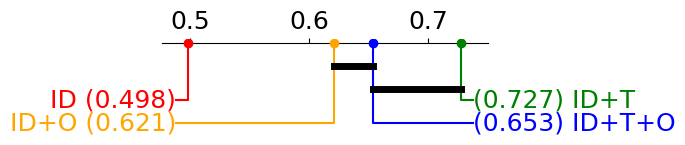

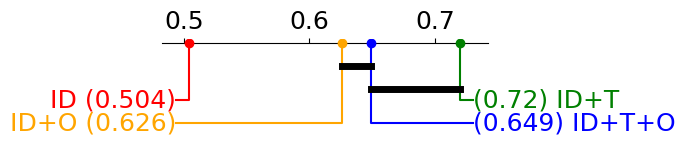

In [27]:
plt.rcParams.update({'font.size': 18})

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor', 'EnergyMonitor', 'MahalanobisMonitor', 'OutsideTheBoxMonitor'] # 
app='f1'

plot_compare_metrics_nemenyi_diagram(results_df_all, monitor_concerned_list, fig_show= not(fig_title_hide),
                                     app=app, save=True, path_image=path_image)

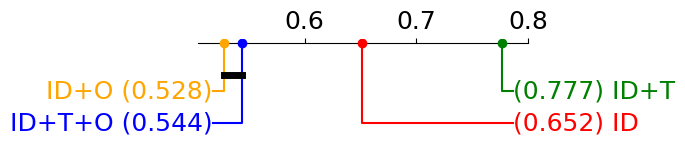

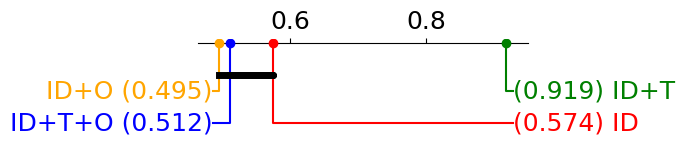

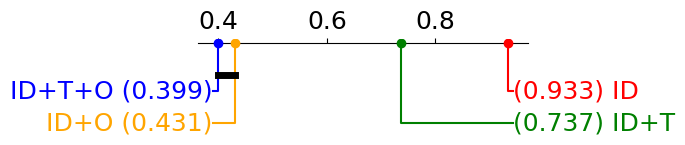

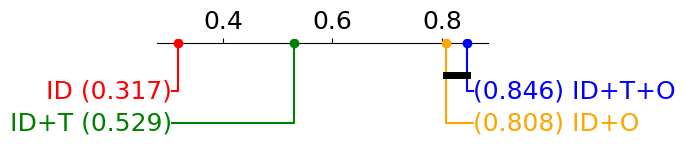

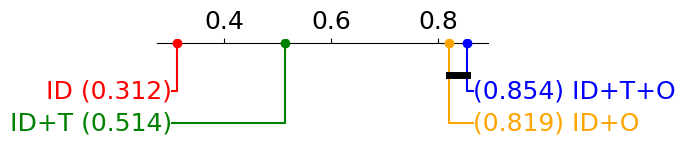

In [28]:
plt.rcParams.update({'font.size': 18})

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor', 'EnergyMonitor', 'MahalanobisMonitor', 'OutsideTheBoxMonitor'] # 
app='gmean'

plot_compare_metrics_nemenyi_diagram(results_df_all, monitor_concerned_list, fig_show= not(fig_title_hide),
                                     app=app, save=True, path_image=path_image)

In [29]:
metrics_compare = ['f1', 'gmean', 'recall', 'precision', 'specificity']
metrics_compare_colname = ["f1-score_evaluation",  "gmean_evaluation", 
                           'recall-score_evaluation', 'precision-score_evaluation', 'specificity-score_evaluation']

# Define RGB color 
red = (255/255.,140/255.,0/255.) # Red cells = the case corresponding to the row is worst than the column
green = (100/255.,149/255.,237/255.) # Green cells = the case corresponding to the row is better than the column

case_permute = [0, 1, 3, 2] # case 3 linking to strategy ID+O while case 2 linking to strategy ID+T+O
real_case_name = ["ID", 'ID+T', 'ID+O', 'ID+T+O']
alpha = 0.05

result_to_compare = results_df_all[results_df_all["Monitor"].isin(monitor_concerned_list)]

result_to_compare_optf1 = result_to_compare[result_to_compare['Optimal approach']=='f1']
result_to_compare_optgmean = result_to_compare[result_to_compare['Optimal approach']=='gmean']


res_statistic = np.zeros((1, len(metrics_compare_colname)))
res_pvalue = np.zeros((1, len(metrics_compare_colname)))
flag =  np.zeros((1, len(metrics_compare_colname))) # -1 if less, +1 if greater, 0 if equal 

p_value_list = []
for no_metric, col in enumerate(metrics_compare_colname):

    score_ido_optf1 = result_to_compare_optf1[result_to_compare_optf1["Case"]==f'Case3'][col].tolist()
    score_id_gmean = result_to_compare_optgmean[result_to_compare_optgmean["Case"]==f'Case0'][col].tolist()

    # conduct the Wilcoxon-Signed Rank Test to compare if 2 scores come from same or other distributions
    res = wilcoxon(score_ido_optf1, score_id_gmean, alternative='two-sided')

    res_statistic[0, no_metric] = res.statistic
    res_pvalue[0, no_metric] = res.pvalue    
    if res.pvalue <= alpha: #different distribution 
            avg_rank_groupA, avg_rank_groupB = compute_average_ranks(score_ido_optf1, score_id_gmean)

            if avg_rank_groupA > avg_rank_groupB: 
                print(f"***ID+O optimize with OS+F1 gives better {col} than ID optimized with g-mean.")
                print("pvalue of wilcoxon test associated : %.0e" %res.pvalue )
            else:
                print(f"***ID+O optimize with OS+F1 gives worse {col} than ID optimized with g-mean.")
                print("pvalue of wilcoxon test associated : %.0e" %res.pvalue )
    else:
        print(f'***There is no significant difference of {col} between ID+O optimized with OS+F1 and ID optimized with g-mean.')
        print("pvalue of wilcoxon test associated : %.0e" %res.pvalue )


***There is no significant difference of f1-score_evaluation between ID+O optimized with OS+F1 and ID optimized with g-mean.
pvalue of wilcoxon test associated : 2e-01
***ID+O optimize with OS+F1 gives worse gmean_evaluation than ID optimized with g-mean.
pvalue of wilcoxon test associated : 3e-10
***ID+O optimize with OS+F1 gives better recall-score_evaluation than ID optimized with g-mean.
pvalue of wilcoxon test associated : 2e-06
***ID+O optimize with OS+F1 gives worse precision-score_evaluation than ID optimized with g-mean.
pvalue of wilcoxon test associated : 3e-04
***ID+O optimize with OS+F1 gives worse specificity-score_evaluation than ID optimized with g-mean.
pvalue of wilcoxon test associated : 1e-08


### Final Results

Check article section Results for more details.

## DISCUSSION 

Our experiments confirmed the superiority of the ID+T strategy for building the Threshold Optimization dataset. As anticipated, tuning the threshold with data closely mirroring the evaluation dataset yielded the best results. However, the decreased performance observed when adding generic threats to the Optimization set is less intuitive. In this section, we propose to try understanding this behavior through the study of a specific example.


### Intuition with a fixed case example

#### Choosing the case to analyze

We want to choose a case with following conditions: 
- AUROC on threshold evaluation set > 0.8
- if optimizing in F1, performance evaluated (focus in F1 and gmean) must follow the order : ID+T> ID+O > ID
- if optimizing in g-mean, performance evaluated (focus in F1 and gmean) must follow the order : ID+T> ID > ID+O

In [30]:
results_df_all = pd.read_csv(path_csv_results + 'Result-Thresh-Opt_resampling.csv')

monitor_concerned_list = ['MaxSoftmaxProbabilityMonitor','OutsideTheBoxMonitor', 'EnergyMonitor', 'MahalanobisMonitor']


# First condition, the monitor ability to distinguish two classes on evaluation set is good, indentified by AUROC score
results_short = results_df_all[results_df_all['AUROC-score_evaluation']>0.8]

# Condition for optimizing with F1
app='f1'
results_used = results_short[results_short['Optimal approach']==app]
results_used = results_used[results_used['Monitor'].isin(monitor_concerned_list)]

metrics_compare_colname = ["f1-score_evaluation",  "gmean_evaluation", 
                           'recall-score_evaluation', 'precision-score_evaluation', 'specificity-score_evaluation']

idx_metric = 0 # 0 for f1 evaluated and 1 for gmean evaluated
f1_evaluation_vect_case0_optf1 = np.array(results_used[results_used["Case"]==f'Case0'][metrics_compare_colname[idx_metric]].tolist())
f1_evaluation_vect_case1_optf1 = np.array(results_used[results_used["Case"]==f'Case1'][metrics_compare_colname[idx_metric]].tolist())
f1_evaluation_vect_case3_optf1 = np.array(results_used[results_used["Case"]==f'Case3'][metrics_compare_colname[idx_metric]].tolist())

idx_metric = 1 # 0 for f1 evaluated and 1 for gmean evaluated
gmean_evaluation_vect_case0_optf1 = np.array(results_used[results_used["Case"]==f'Case0'][metrics_compare_colname[idx_metric]].tolist())
gmean_evaluation_vect_case1_optf1 = np.array(results_used[results_used["Case"]==f'Case1'][metrics_compare_colname[idx_metric]].tolist())
gmean_evaluation_vect_case3_optf1 = np.array(results_used[results_used["Case"]==f'Case3'][metrics_compare_colname[idx_metric]].tolist())

# Condition for optimizing with F1
app='gmean'
results_used = results_short[results_short['Optimal approach']==app]
results_used = results_used[results_used['Monitor'].isin(monitor_concerned_list)]

idx_metric = 0 # 0 for f1 evaluated and 1 for gmean evaluated
f1_evaluation_vect_case0_optgmean = np.array(results_used[results_used["Case"]==f'Case0'][metrics_compare_colname[idx_metric]].tolist())
f1_evaluation_vect_case1_optgmean = np.array(results_used[results_used["Case"]==f'Case1'][metrics_compare_colname[idx_metric]].tolist())
f1_evaluation_vect_case3_optgmean = np.array(results_used[results_used["Case"]==f'Case3'][metrics_compare_colname[idx_metric]].tolist())

idx_metric = 1 # 0 for f1 evaluated and 1 for gmean evaluated
gmean_evaluation_vect_case0_optgmean = np.array(results_used[results_used["Case"]==f'Case0'][metrics_compare_colname[idx_metric]].tolist())
gmean_evaluation_vect_case1_optgmean = np.array(results_used[results_used["Case"]==f'Case1'][metrics_compare_colname[idx_metric]].tolist())
gmean_evaluation_vect_case3_optgmean = np.array(results_used[results_used["Case"]==f'Case3'][metrics_compare_colname[idx_metric]].tolist())

print('Number of experiences (per case/strategy, per optimization metric, and per evaluation metric) with AUROC>0.8 :', len(f1_evaluation_vect_case0_optf1))
for i in range(len(f1_evaluation_vect_case0_optf1)): 
    cond_optf1 = (f1_evaluation_vect_case1_optf1[i] >= f1_evaluation_vect_case3_optf1[i] >= f1_evaluation_vect_case0_optf1[i]) and \
                    (gmean_evaluation_vect_case1_optf1[i] >= gmean_evaluation_vect_case3_optf1[i] >= gmean_evaluation_vect_case0_optf1[i])
    cond_optgmean = (f1_evaluation_vect_case1_optgmean[i] >= f1_evaluation_vect_case0_optgmean[i] >= f1_evaluation_vect_case3_optgmean[i]) and \
                      (gmean_evaluation_vect_case1_optgmean[i] >= gmean_evaluation_vect_case0_optgmean[i] >= gmean_evaluation_vect_case3_optgmean[i])
    
    if cond_optf1 and cond_optgmean:
        print('Extreme case satisfying required conditions with index (in filtered dataframe): ', i)

Number of experiences (per case/strategy, per optimization metric, and per evaluation metric) with AUROC>0.8 : 154
Extreme case satisfying required conditions with index (in filtered dataframe):  65
Extreme case satisfying required conditions with index (in filtered dataframe):  66
Extreme case satisfying required conditions with index (in filtered dataframe):  87


In [31]:
idx_extremecase = 66

idx_global_case0 = results_used[results_used["Case"]==f'Case0'].iloc[idx_extremecase].name
idx_global_case1 = results_used[results_used["Case"]==f'Case1'].iloc[idx_extremecase].name
idx_global_case2 = results_used[results_used["Case"]==f'Case2'].iloc[idx_extremecase].name
idx_global_case3 = results_used[results_used["Case"]==f'Case3'].iloc[idx_extremecase].name

# Display info of extreme case with g-mean as the optimization metric 
results_df_all.loc[[idx_global_case0, idx_global_case1, idx_global_case2, idx_global_case3], results_df_all.columns[19:]]

,f1-score_evaluation,gmean_evaluation,youden_evaluation,recall-score_evaluation,precision-score_evaluation,accuracy-score_evaluation,specificity-score_evaluation,fpr-score_evaluation,tpr-score_evaluation,MCC-score_evaluation,Kappa-score_evaluation,AUROC-score_optimization,AUPR_rejectPosi-score_optimization,TPR@95TNR-score_optimization,AUROC-score_evaluation,AUPR_rejecPosi-score_evaluation,TPR@95TNR-score_evaluation
2020,0.636288,0.786522,0.589479,0.908730,0.489525,0.7382,0.680749,0.319251,0.908730,0.512922,0.459123,0.904435,0.884156,0.489028,0.847721,0.558285,0.211111
2021,0.643428,0.791406,0.591535,0.878968,0.507446,0.7545,0.712567,0.287433,0.878968,0.517836,0.475992,0.852774,0.804397,0.242006,0.847721,0.558285,0.211111
2022,0.589425,0.718646,0.455613,0.612698,0.567856,0.7849,0.842914,0.157086,0.612698,0.444577,0.443988,0.710484,0.698440,0.135592,0.847721,0.558285,0.211111
2023,0.589425,0.718646,0.455613,0.612698,0.567856,0.7849,0.842914,0.157086,0.612698,0.444577,0.443988,0.706020,0.652067,0.132178,0.847721,0.558285,0.211111


In [32]:
# Display info of extreme case with F1 as the optimization metric 
results_df_all.loc[[idx_global_case0-4, idx_global_case1-4, idx_global_case2-4, idx_global_case3-4], results_df_all.columns[19:]]

,f1-score_evaluation,gmean_evaluation,youden_evaluation,recall-score_evaluation,precision-score_evaluation,accuracy-score_evaluation,specificity-score_evaluation,fpr-score_evaluation,tpr-score_evaluation,MCC-score_evaluation,Kappa-score_evaluation,AUROC-score_optimization,AUPR_rejectPosi-score_optimization,TPR@95TNR-score_optimization,AUROC-score_evaluation,AUPR_rejecPosi-score_evaluation,TPR@95TNR-score_evaluation
2016,0.586951,0.730355,0.520363,0.971032,0.420591,0.6556,0.549332,0.450668,0.971032,0.458014,0.362898,0.904435,0.884156,0.489028,0.847721,0.558285,0.211111
2017,0.636389,0.786616,0.589742,0.909127,0.489530,0.7382,0.680615,0.319385,0.909127,0.513138,0.459234,0.852774,0.804397,0.242006,0.847721,0.558285,0.211111
2018,0.615247,0.765130,0.567216,0.952778,0.454305,0.6997,0.614439,0.385561,0.952778,0.493329,0.415913,0.710484,0.698440,0.135592,0.847721,0.558285,0.211111
2019,0.628929,0.779654,0.585702,0.936905,0.473336,0.7214,0.648797,0.351203,0.936905,0.508579,0.442136,0.706020,0.652067,0.132178,0.847721,0.558285,0.211111


In [33]:
# Display info of extreme case (Monitoring techniques, architecture, ID set, OODset, OOD type, case/strategy of opt set)
results_df_all.loc[[idx_global_case0, idx_global_case1, idx_global_case2, idx_global_case3], results_df_all.columns[0:6]]

,Monitor,Model,ID Dataset,OOD Dataset,OOD Type,Case
2020,MahalanobisMonitor,resnet,cifar10,cifar10,fgsm,Case0
2021,MahalanobisMonitor,resnet,cifar10,cifar10,fgsm,Case1
2022,MahalanobisMonitor,resnet,cifar10,cifar10,fgsm,Case2
2023,MahalanobisMonitor,resnet,cifar10,cifar10,fgsm,Case3


In [34]:
id_dataset = results_used.loc[idx_global_case0, 'ID Dataset'] # 'cifar10'
ood_dataset = results_used.loc[idx_global_case0, 'OOD Dataset'] # 'svhn'

model = results_used.loc[idx_global_case0, 'Model'] # 'resnet'
layer_id = 32 if model == 'resnet' else 98 # 32 for resnet and 98 for densenet
split_ratio = 0.5

if 'novelty' in results_used.loc[idx_global_case0, 'OOD Type']:
    atk = None 
    cov_shift = None 
elif results_used.loc[idx_global_case0, 'OOD Type'] in ["brightness", "blur", "pixelization"]:
    atk = None
    cov_shift = results_used.loc[idx_global_case0, 'OOD Type']
else:
    atk = results_used.loc[idx_global_case0, 'OOD Type']
    cov_shift = None

monitor_name = results_used.loc[idx_global_case0, 'Monitor']
beta = 1

dataset_exp = ThresholdOptDataset(id_dataset, ood_dataset, model, layer_id,  split_ratio, cov_shift, atk, batch_size, save_flag_type=True)    

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./Data\test_32x32.mat
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ./Data\test_32x32.mat
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


#### Analysis for intuition

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def compute_metrics_score(y_true, y_pred, beta=1):
    
    # Compute different metrics threshold-based
    fbeta = fbeta_score(y_true, y_pred, beta=beta)
    precision = precision_score(y_true, y_pred)
    recall = recall_score (y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred) #binary accuracy or jaccard score
    specificity = get_specificity_score(y_true, y_pred)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp+fn)
    fpr = fp / (fp+tn)
    
    gmean = np.sqrt(tpr * (1 - fpr))
    youden = tpr - fpr 
    return fbeta, gmean, recall, precision, specificity, fpr, accuracy, youden
    
def plot_distribution_score_optimization_fixedcase(scores_optimization, y_true_optimization, 
                                                    threshOpt, bins, beta=1, fig_title="Threshold optimization set", stat_method='count'):
    
    metric_display = [f'f{beta}', 'gmean', 'recall', 'precision', 'specificity']
    
    
    # Compute scoring metrics on optimization using threshold optimized
    y_pred_optimization = -scores_optimization >= threshOpt
    f1_opt, gmean_opt, recall_opt, precision_opt, specificity_opt, _, _, _ =  compute_metrics_score(y_true_optimization, 
                                                                               y_pred_optimization, beta=beta)

    # Histplot for optimization set 
                                                                                                         
    ## split scores in 2 classes 
    idx_groundtruth_reject = np.where(y_true_optimization==1)
    idx_groundtruth_accept = np.where(y_true_optimization==0)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [2, 1]})
    fig.suptitle(fig_title)
    
    ax = sns.histplot(-scores_optimization[idx_groundtruth_reject], label='Should Reject', stat=stat_method, kde=True, ax=axes[0], bins=bins)
    ax = sns.histplot(-scores_optimization[idx_groundtruth_accept], label='Should Accept', stat=stat_method, kde=True, ax=axes[0], bins=bins)
    axes[0].axvline(threshOpt, color='red', label='ThreshOpt=%.6f' %(threshOpt))
    axes[0].plot([], [], ' ', label="Accepted < Threshold $\leq$ Rejected")
    axes[0].legend()
    
    ax = sns.barplot(x=metric_display, y=[f1_opt, gmean_opt, recall_opt, precision_opt, specificity_opt], 
                     ax=axes[1], palette=['yellow', 'green', 'purple', 'brown', 'cyan'])
    axes[1].bar_label(axes[1].containers[0], fmt='%.2f')
    axes[1].set(ylim=(0, 1))
    for item in axes[1].get_xticklabels():
        item.set_rotation(45)
        
    return fig

def plot_distribution_score_evaluation_fixedcase(scores_evaluation, y_true_evaluation, 
                                                    threshOpt, threshCheatevaluation, bins, beta=1, 
                                                fig_title="Threshold evaluation set", stat_method='count'):
    
    metric_display = [f'f{beta}', 'gmean', 'recall', 'precision', 'specificity']
    
    
    # Compute scoring metrics on evaluation set using threshold optimized
    y_pred_evaluation = -scores_evaluation >= threshOpt
    f1_eval, gmean_eval, recall_eval, precision_eval, specificity_eval, _, _, _ =  compute_metrics_score(y_true_evaluation,
                                                                                                         y_pred_evaluation, beta=beta) 
    
    # Compute scoring metrics on evaluation set knowing ground truth, thus the theoric threshold that gives maximim gmean
    y_pred_eval_cheat = -scores_evaluation >= threshCheatevaluation
    f1_cheat, gmean_cheat, recall_cheat, precision_cheat, specificity_cheat, _, _, _ =  compute_metrics_score(y_true_evaluation, 
                                                                               y_pred_eval_cheat, beta=beta)
    
    # Histplot for evaluation set 
    
    ## split scores in 2 classes 
    idx_groundtruth_reject = np.where(y_true_evaluation==1)
    idx_groundtruth_accept = np.where(y_true_evaluation==0)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5), gridspec_kw={'width_ratios': [2, 1]})
    fig.suptitle(fig_title)
    
    sns.histplot(-scores_evaluation[idx_groundtruth_reject], label='Should Reject', stat=stat_method, kde=True, ax=axes[0], bins=bins)
    sns.histplot(-scores_evaluation[idx_groundtruth_accept], label='Should Accept', stat=stat_method, kde=True, ax=axes[0], bins=bins)
    axes[0].axvline(threshOpt, color='red', label='ThreshOpt=%.6f' %(threshOpt))
    axes[0].axvline(threshCheatevaluation, color='blue', ls='--', label='ThreshMaxScoreTheory=%.6f' %(threshCheatevaluation))
    axes[0].plot([], [], ' ', label="Accepted < Threshold $\leq$ Rejected")
    
    axes[0].legend()
    
    raw_data = {'x':[i for i in metric_display for _ in range(2)], 
              'y': [f1_eval, f1_cheat,
                    gmean_eval, gmean_cheat,
                    recall_eval, recall_cheat,
                    precision_eval, precision_cheat,
                    specificity_eval, specificity_cheat],
              'category': ['ThreshOpt', 'ThreshTheory', 'ThreshOpt', 'ThreshTheory', 'ThreshOpt', 'ThreshTheory', 'ThreshOpt', 'ThreshTheory', 'ThreshOpt', 'ThreshTheory']}
    ax = sns.barplot(x='x', y='y', data=raw_data, hue='category', ax=axes[1])
    axes[1].bar_label(axes[1].containers[0], rotation=90, fmt='%.2f', label_type='center', color='white')
    axes[1].bar_label(axes[1].containers[1], rotation=90, fmt='%.2f', label_type='center', color='white')

    axes[1].set(ylim=(0, 1))
    for item in axes[1].get_xticklabels():
        item.set_rotation(45)
    
    return fig

def plot_confusionmatrix(y_true, y_pred):
    plt.rcParams['figure.figsize'] = [4, 4]  
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    plt.rcParams['figure.figsize'] = [8, 6]  

def get_information_fixedcase_optGmean(dataset_exp, monitor_name, case):
    # Extract vector data train to fit the monitor
    features_train = dataset_exp.features_train.copy()
    logits_train = dataset_exp.logits_train.copy()
    softmax_train = dataset_exp.softmax_train.copy()
    pred_train = dataset_exp.pred_train.copy()
    lab_train = dataset_exp.lab_train.copy()
    
    # Extract vector data optimization
    features_optimization = dataset_exp.__dict__[f"features_case{case}_optimization"].copy()
    logits_optimization = dataset_exp.__dict__[f"logits_case{case}_optimization"].copy()
    softmax_optimization = dataset_exp.__dict__[f"softmax_case{case}_optimization"].copy()
    pred_optimization = dataset_exp.__dict__[f"pred_case{case}_optimization"].copy()
    lab_optimization = dataset_exp.__dict__[f"lab_case{case}_optimization"].copy()
    y_true_optimization = dataset_exp.__dict__[f"y_true_case{case}_optimization"].copy()
    flag_type_optimization = dataset_exp.__dict__[f"flag_type_case{case}_optimization"].copy()

    #Extract vector data evaluation
    features_evaluation = dataset_exp.features_allcase_evaluation.copy()
    logits_evaluation = dataset_exp.logits_allcase_evaluation.copy()
    softmax_evaluation = dataset_exp.softmax_allcase_evaluation.copy()
    pred_evaluation = dataset_exp.pred_allcase_evaluation.copy()
    lab_evaluation = dataset_exp.lab_allcase_evaluation.copy()
    y_true_evaluation = dataset_exp.y_true_allcase_evaluation.copy()
    
    feature_extractor = copy.deepcopy(dataset_exp.feature_extractor)

    if 1:
        # Upsampling minority class
        if not f"flag_type_case{case}_optimization" in dataset_exp.__dict__.keys():
            flag_type_optimization = None
            features_optimization, logits_optimization, \
                softmax_optimization, pred_optimization, \
                lab_optimization, y_true_optimization =  upsampling_naive(features_optimization, logits_optimization, softmax_optimization, 
                                                            pred_optimization, lab_optimization, y_true_optimization 
                                                            )
        else:
            features_optimization, logits_optimization, \
                softmax_optimization, pred_optimization, \
                lab_optimization, y_true_optimization, \
            flag_type_optimization =  upsampling_naive_add_flag(features_optimization, logits_optimization, softmax_optimization, 
                                                            pred_optimization, lab_optimization, y_true_optimization, flag_type_optimization 
                                                            )
    if monitor_name == 'MaxSoftmaxProbabilityMonitor':
        # Fit the monitor with optimizationing data
        monitor = MaxSoftmaxProbabilityMonitor()
        monitor.fit()
        # Predict with monitor
        scores_optimization = monitor.predict(softmax_optimization)
        scores_evaluation = monitor.predict(softmax_evaluation)

    elif monitor_name == 'OutsideTheBoxMonitor':
        nc=3
        # Fit the monitor with optimizationing data
        monitor = OutsideTheBoxMonitor(id_dataset, model, layer_id, n_clusters=nc, is_cv=True)
        monitor.fit(features_train[0], pred_train, lab_train, save=True)
        # Predict with monitor
        scores_optimization = monitor.predict(features_optimization[0], pred_optimization) * (-1) #convention 
        scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation) * (-1) #convention 
    elif monitor_name == 'GaussianMixtureMonitor':
        nc=3
        cc="full"
        # Fit the monitor with optimizationing data
        monitor = GaussianMixtureMonitor(id_dataset, model, layer_id, n_components=nc,
                             consoptimizationt=cc, is_cv=True)
        monitor.fit(features_train[0], pred_train, lab_train, save=True)
        # Predict with monitor
        scores_optimization = monitor.predict(features_optimization[0], pred_optimization)
        scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation)
    elif monitor_name == 'MahalanobisMonitor':
        # Fit the monitor with optimizationing data
        monitor = MahalanobisMonitor(id_dataset, model, layer_id)
        monitor.fit(features_train[0], pred_train, lab_train, save=True)
        # Predict with monitor
        scores_optimization = monitor.predict(features_optimization[0], pred_optimization)
        scores_evaluation = monitor.predict(features_evaluation[0], pred_evaluation)
    elif monitor_name == 'ReActMonitor_MSP':
        clip=0.9
        # Fit the monitor with optimizationing data
        monitor = ReActMonitor(quantile_value=clip)
        monitor.fit(feature_extractor, features_train[-1])
        # Predict with monitor
        scores_optimization = monitor.predict(features_optimization[-1])
        scores_evaluation = monitor.predict(features_evaluation[-1])
    elif monitor_name == 'EnergyMonitor':
        # Fit the monitor with optimizationing data
        monitor = EnergyMonitor(temperature=1)
        monitor.fit()
        # Predict with monitor
        scores_optimization = monitor.predict(logits_optimization)
        scores_evaluation = monitor.predict(logits_evaluation)
    elif monitor_name == 'ReActMonitor_Energy':
        clip=0.9
        # Fit the monitor with optimizationing data
        monitor = ReActMonitor(quantile_value=clip)
        monitor.fit(feature_extractor, features_train[-1])
        # Predict with monitor
        scores_optimization = monitor.predict(features_optimization[-1])
        scores_evaluation = monitor.predict(features_evaluation[-1])
    else: 
        raise Exception(f"Code not contain this monitor: {monitor_name}")
        
    app == "f1"
    #optimize threshold with fbeta
    threshOpt_optf1, _, _, _ = get_optimal_threshold_f1_new(-scores_optimization, y_true_optimization, 
                                                                  beta=1, display=False) #new function
    threshCheatevaluation_optf1, _, _, _ = get_optimal_threshold_f1_new(-scores_evaluation, y_true_evaluation, 
                                                                             beta=1, display=False) #new function
    app == 'gmean'
    #optimize threshold with gmean
    threshOpt_optgmean, _, _, _ = get_optimal_threshold_Gmean(-scores_optimization, y_true_optimization, display=False) #new function
    threshCheatevaluation_optgmean, _, _, _ = get_optimal_threshold_Gmean(-scores_evaluation, y_true_evaluation, display=False) #new function
    
    # return all informations if further analysis needed (extra)
    return scores_optimization, scores_evaluation, y_true_optimization, y_true_evaluation, threshOpt_optf1, threshOpt_optgmean, threshCheatevaluation_optf1, threshCheatevaluation_optgmean, flag_type_optimization
    

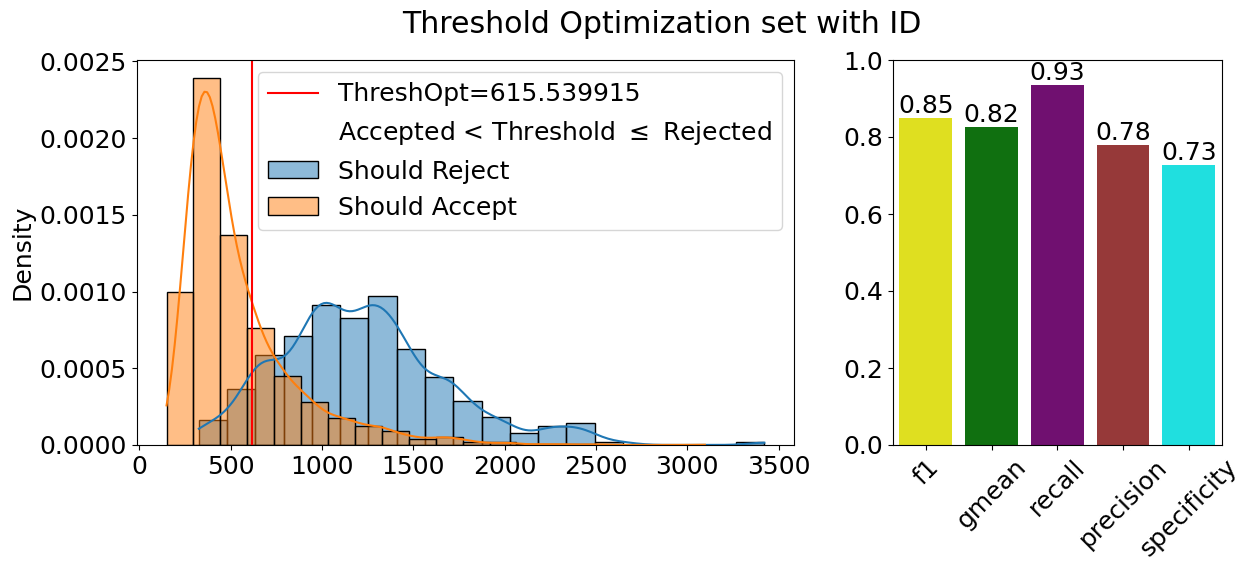

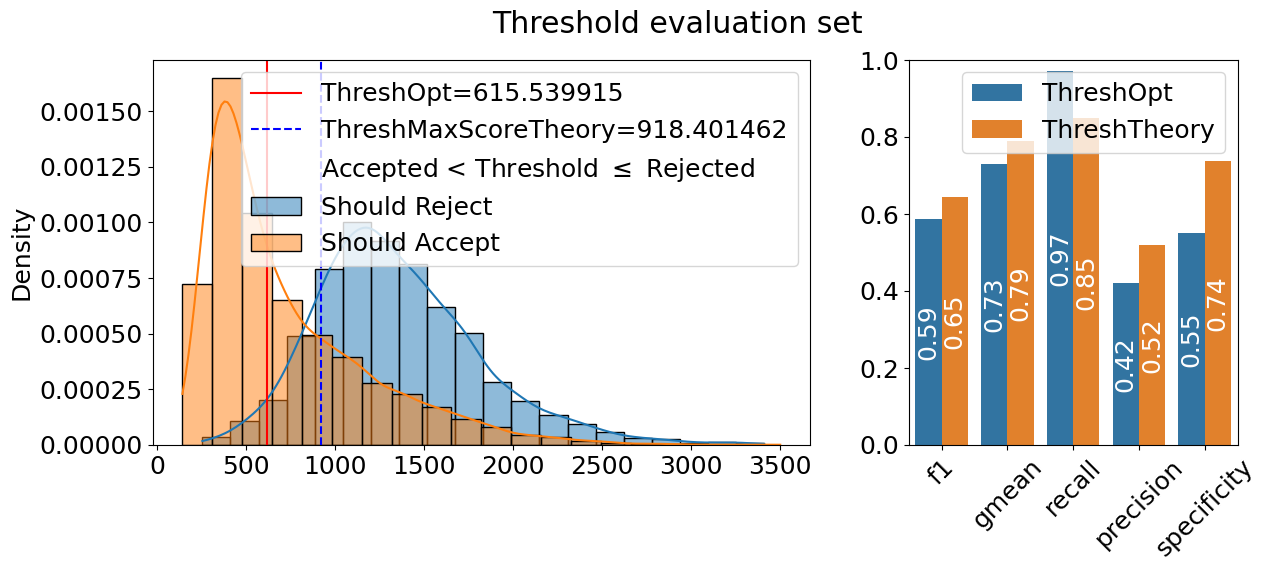

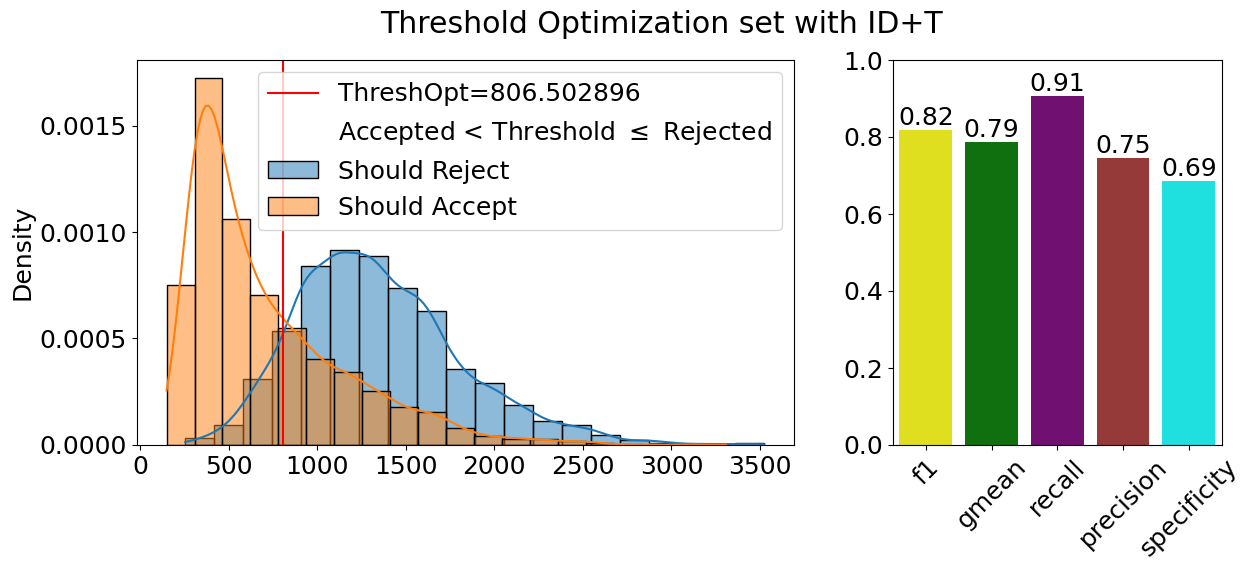

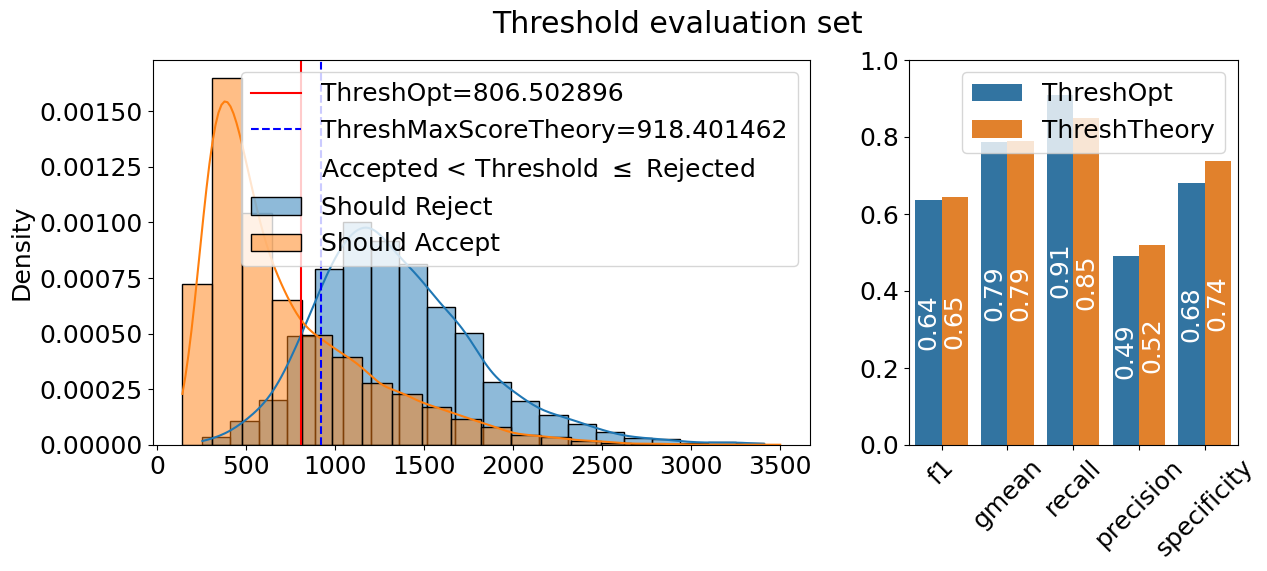

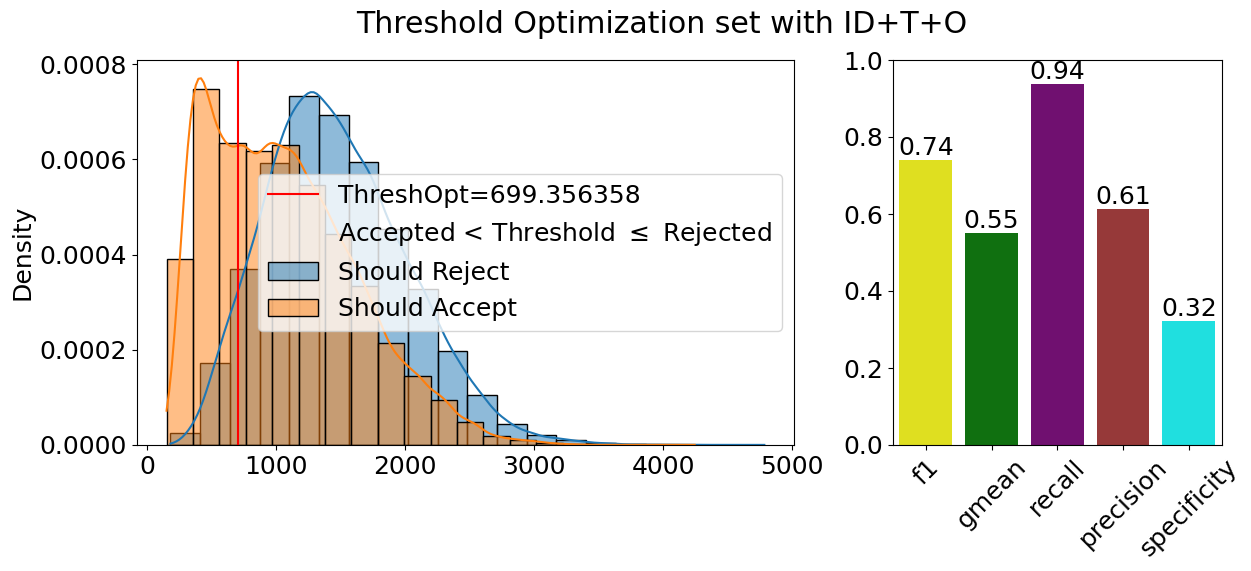

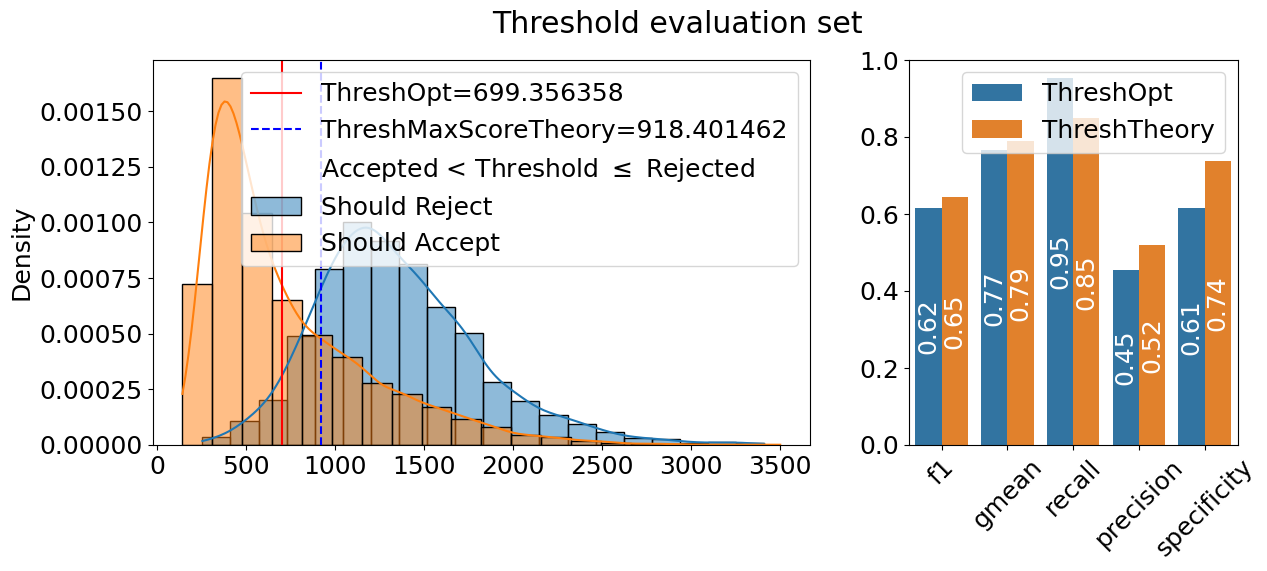

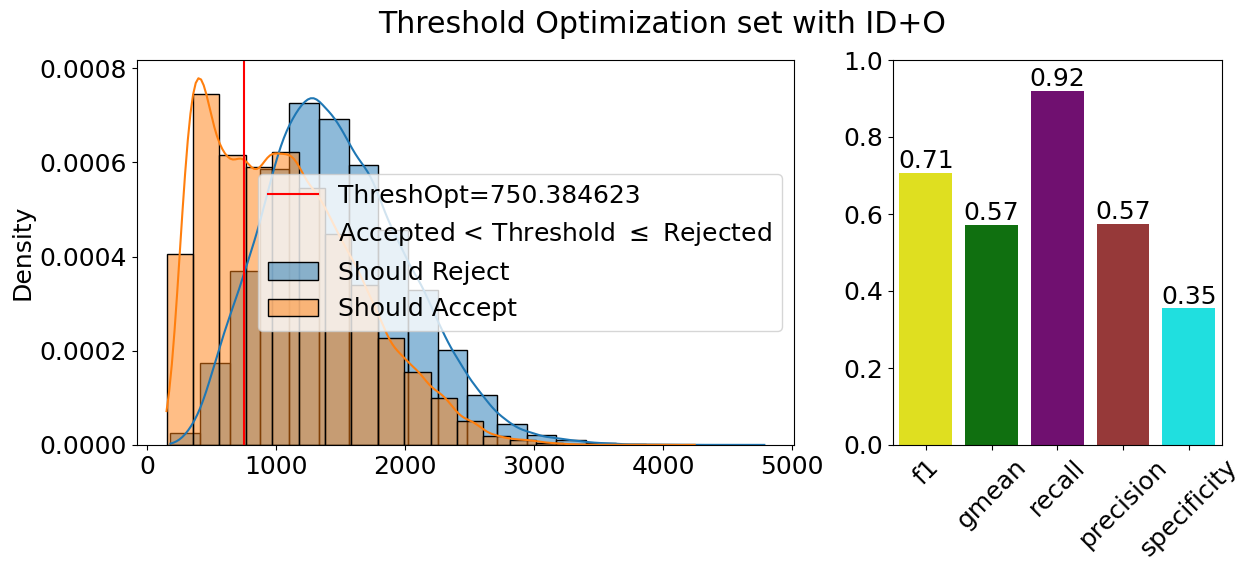

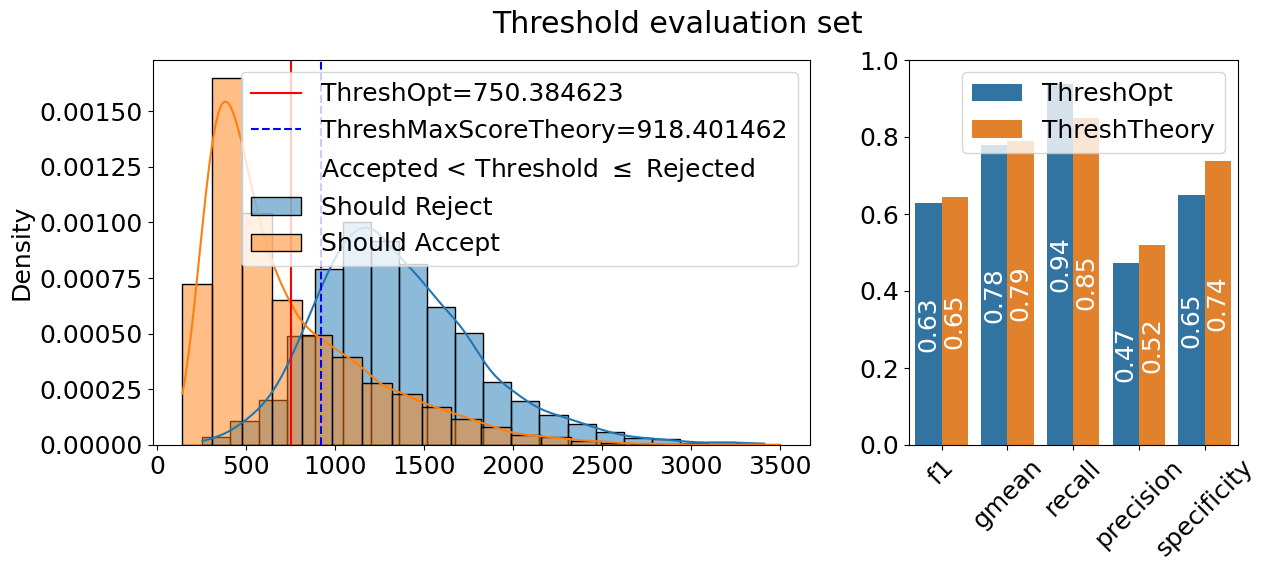

In [36]:
plt.rcParams.update({'font.size': 18})
bins = 20
stat_method = 'density'
fixed_case = 'examplecase'

case_0 = 0
scores_optimization_0, scores_evaluation ,y_true_optimization_0, y_true_evaluation , threshOpt_optf1_0, threshOpt_optgmean_0, threshCheatF1Eval, threshCheatGmeanEval, _ = get_information_fixedcase_optGmean(dataset_exp, monitor_name, case_0)
f = plot_distribution_score_optimization_fixedcase(scores_optimization_0, y_true_optimization_0, threshOpt_optf1_0, bins=bins, beta=beta, fig_title='Threshold Optimization set with ID', stat_method=stat_method)
f = plot_distribution_score_evaluation_fixedcase(scores_evaluation, y_true_evaluation, threshOpt_optf1_0, threshCheatF1Eval, bins=bins, beta=beta, stat_method=stat_method)

case_1 = 1
scores_optimization_1, _ ,y_true_optimization_1, _ ,threshOpt_optf1_1, threshOpt_optgmean_1, _, _,flag_type_optimization_1 = get_information_fixedcase_optGmean(dataset_exp, monitor_name, case_1)
f = plot_distribution_score_optimization_fixedcase(scores_optimization_1, y_true_optimization_1, threshOpt_optf1_1, bins=bins, beta=beta, fig_title='Threshold Optimization set with ID+T', stat_method=stat_method)
f = plot_distribution_score_evaluation_fixedcase(scores_evaluation, y_true_evaluation, threshOpt_optf1_1, threshCheatF1Eval, bins=bins, beta=beta, stat_method=stat_method)

case_2 = 2
scores_optimization_2, _ ,y_true_optimization_2, _ ,threshOpt_optf1_2, threshOpt_optgmean_2, _, _, _ = get_information_fixedcase_optGmean(dataset_exp, monitor_name, case_2)
f = plot_distribution_score_optimization_fixedcase(scores_optimization_2, y_true_optimization_2, threshOpt_optf1_2, bins=bins, beta=beta, fig_title='Threshold Optimization set with ID+T+O', stat_method=stat_method)
f = plot_distribution_score_evaluation_fixedcase(scores_evaluation, y_true_evaluation, threshOpt_optf1_2, threshCheatF1Eval, bins=bins, beta=beta, stat_method=stat_method)

case_3 = 3
scores_optimization_3, _ ,y_true_optimization_3, _ ,threshOpt_optf1_3, threshOpt_optgmean_3, _, _, flag_type_optimization_3 = get_information_fixedcase_optGmean(dataset_exp, monitor_name, case_3)
f = plot_distribution_score_optimization_fixedcase(scores_optimization_3, y_true_optimization_3, threshOpt_optf1_3, bins=bins, beta=beta, fig_title='Threshold Optimization set with ID+O', stat_method=stat_method)
f = plot_distribution_score_evaluation_fixedcase(scores_evaluation, y_true_evaluation, threshOpt_optf1_3, threshCheatF1Eval, bins=bins, beta=beta, stat_method=stat_method)


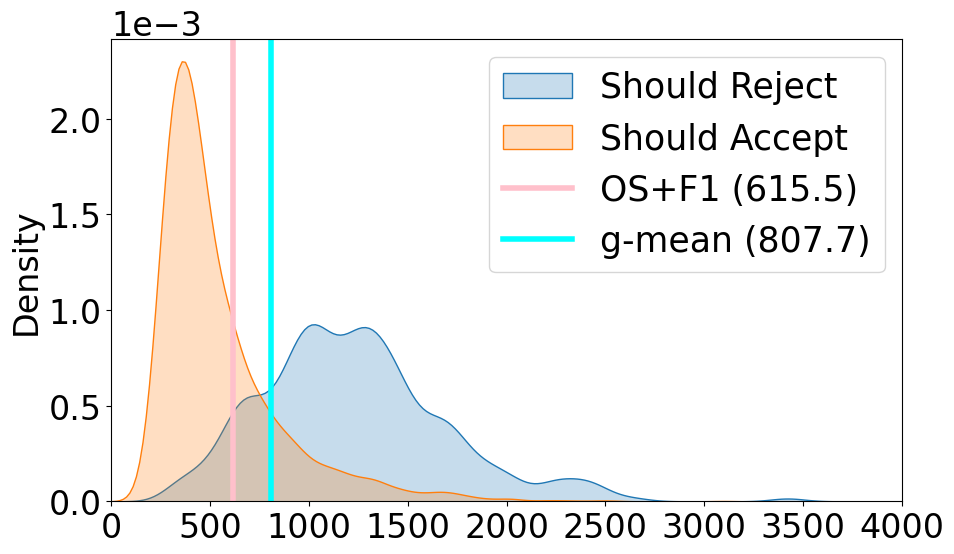

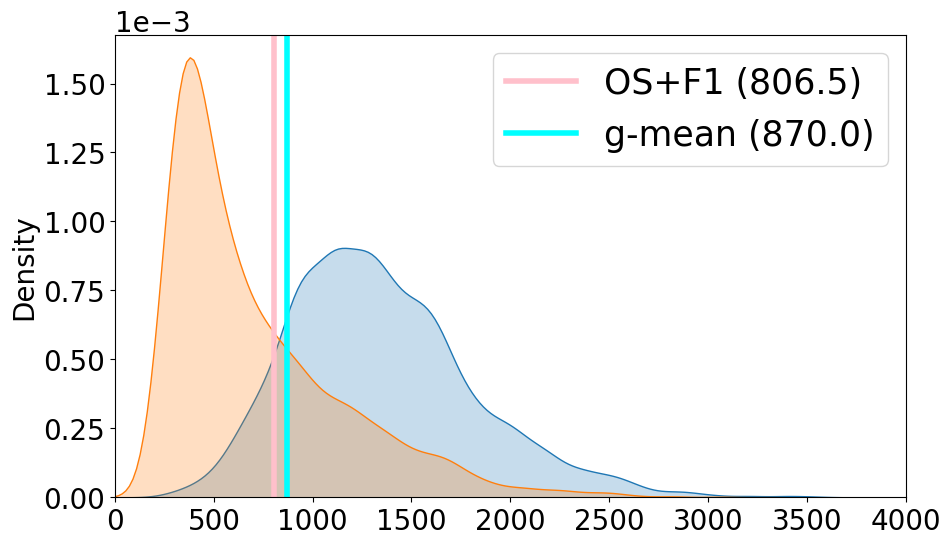

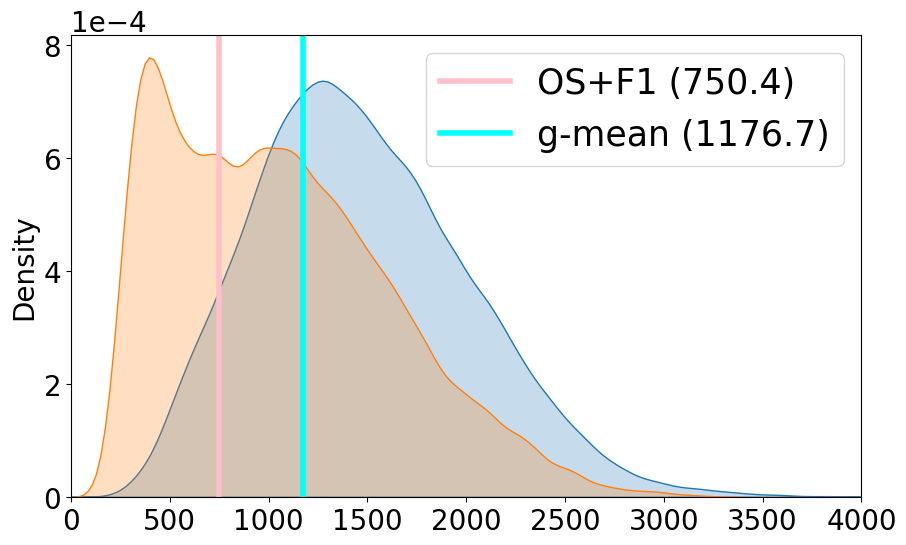

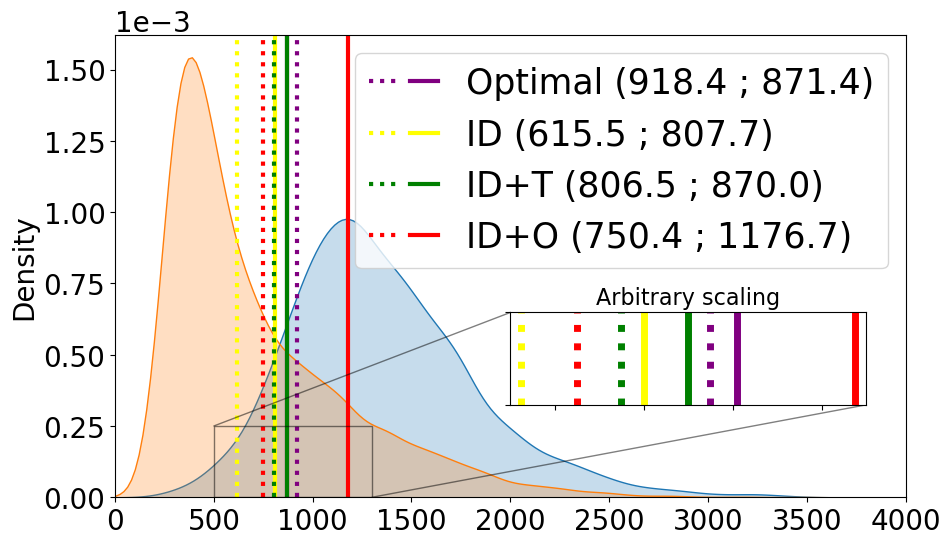

In [37]:
plt.rcParams.update({'font.size': 24, 'figure.figsize':[10.2, 6]})
legend_font_size = 25
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

idx_groundtruth_reject_case0 = np.where(y_true_optimization_0==1)
idx_groundtruth_accept_case0 = np.where(y_true_optimization_0==0)
idx_groundtruth_reject_case1 = np.where(y_true_optimization_1==1)
idx_groundtruth_accept_case1 = np.where(y_true_optimization_1==0)
idx_groundtruth_reject_case2 = np.where(y_true_optimization_2==1)
idx_groundtruth_accept_case2 = np.where(y_true_optimization_2==0)
idx_groundtruth_reject_case3 = np.where(y_true_optimization_3==1)
idx_groundtruth_accept_case3 = np.where(y_true_optimization_3==0)
idx_groundtruth_reject_eval = np.where(y_true_evaluation==1)
idx_groundtruth_accept_eval = np.where(y_true_evaluation==0)

bw_adjust = 1

# distribution optimization set case 0, strategy ID
ax = sns.kdeplot(-scores_optimization_0[idx_groundtruth_reject_case0], fill=True, bw_adjust=bw_adjust, label='Should Reject')
ax = sns.kdeplot(-scores_optimization_0[idx_groundtruth_accept_case0], fill=True, bw_adjust=bw_adjust, label='Should Accept')
plt.axvline(threshOpt_optf1_0, color='pink', lw=4, label='OS+F1 (%.1f)' %(threshOpt_optf1_0))
plt.axvline(threshOpt_optgmean_0, color='cyan', lw=4, label='g-mean (%.1f)' %(threshOpt_optgmean_0))
if not fig_title_hide:
    plt.title('Distribution_optimizationset_extreme_ID')
plt.xlim(xmin=0, xmax=4000)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.rcParams.update({'font.size': 20})
plt.legend( prop = { "size": legend_font_size}) 
plt.savefig(path_image + f'Distribution_optimizationset_extreme_id_{monitor_name}_{id_dataset}_{ood_dataset}_{atk}_{cov_shift}_{model}.png', bbox_inches = 'tight')
plt.show()

# distribution optimization set case 2, strategy ID+T
ax = sns.kdeplot(-scores_optimization_1[idx_groundtruth_reject_case1], fill=True, bw_adjust=bw_adjust)
ax = sns.kdeplot(-scores_optimization_1[idx_groundtruth_accept_case1], fill=True, bw_adjust=bw_adjust)
plt.axvline(threshOpt_optf1_1, color='pink', lw=4, label='OS+F1 (%.1f)' %(threshOpt_optf1_1))
plt.axvline(threshOpt_optgmean_1, color='cyan', lw=4, label='g-mean (%.1f)' %(threshOpt_optgmean_1))
plt.legend( prop = { "size": legend_font_size}) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.rcParams.update({'font.size': 20})
plt.xlim(xmin=0, xmax=4000)
if not fig_title_hide:
    plt.title('Distribution_optimizationset_extreme_ID+T')
plt.savefig(path_image + f'Distribution_optimizationset_extreme_id-t_{monitor_name}_{id_dataset}_{ood_dataset}_{atk}_{cov_shift}_{model}.png', bbox_inches = 'tight')
plt.show()

# distribution optimization set case 3, strategy ID+O
ax = sns.kdeplot(-scores_optimization_3[idx_groundtruth_reject_case3], fill=True, bw_adjust=bw_adjust)
ax = sns.kdeplot(-scores_optimization_3[idx_groundtruth_accept_case3], fill=True, bw_adjust=bw_adjust)

plt.axvline(threshOpt_optf1_3, color='pink', lw=4, label='OS+F1 (%.1f)' %(threshOpt_optf1_3))
plt.axvline(threshOpt_optgmean_3, color='cyan', lw=4, label='g-mean (%.1f)' %(threshOpt_optgmean_3))
plt.legend( prop = { "size": legend_font_size}) 
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.rcParams.update({'font.size': 20})
plt.xlim(xmin=0, xmax=4000)
# plt.ylim(ymin=0, ymax=2.5e-03)
if not fig_title_hide:
    plt.title('Distribution_optimizationset_extreme_ID+O')

plt.savefig(path_image + f'Distribution_optimizationset_extreme_id-0_{monitor_name}_{id_dataset}_{ood_dataset}_{atk}_{cov_shift}_{model}.png', bbox_inches = 'tight')

plt.show()

# distribtion evaluation set
ax = sns.kdeplot(-scores_evaluation[idx_groundtruth_reject_eval], fill=True, bw_adjust=bw_adjust)
ax = sns.kdeplot(-scores_evaluation[idx_groundtruth_accept_eval], fill=True, bw_adjust=bw_adjust)

p1 = ax.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='Optimal(%.1f;%.1f)' %(threshCheatF1Eval, threshCheatGmeanEval), lw=3)
p2 = ax.axvline(threshCheatGmeanEval, color='purple', lw=3)
p3 = ax.axvline(threshOpt_optf1_0, color='yellow', label='ID         (%.1f;%.1f)' %(threshOpt_optf1_0, threshOpt_optgmean_0),  ls='dotted', lw=3)
p4 = ax.axvline(threshOpt_optgmean_0, color='yellow', lw=3)

p5 = ax.axvline(threshOpt_optf1_1, color='green', label='ID+T     (%.1f;%.1f)' %(threshOpt_optf1_1, threshOpt_optgmean_1),  ls='dotted', lw=3)
p6 = ax.axvline(threshOpt_optgmean_1, color='green' , lw=3)

p7 = ax.axvline(threshOpt_optf1_3, color='red', label='ID+O     (%.1f;%.0f)' %(threshOpt_optf1_3, threshOpt_optgmean_3),  ls='dotted', lw=3)
p8 = ax.axvline(threshOpt_optgmean_3, color='red' , lw=3)

# add label stacked in-line
from matplotlib.legend_handler import HandlerTuple
l = ax.legend([(p1, p2), (p3, p4), (p5, p6), (p7, p8)], ['Optimal (%.1f ; %.1f)' %(threshCheatF1Eval, threshCheatGmeanEval),
                                'ID (%.1f ; %.1f)' %(threshOpt_optf1_0, threshOpt_optgmean_0), 
                                'ID+T (%.1f ; %.1f)' %(threshOpt_optf1_1, threshOpt_optgmean_1), 
                                'ID+O (%.1f ; %.1f)' %(threshOpt_optf1_3, threshOpt_optgmean_3)],
               handler_map={tuple: HandlerTuple(ndivide=None)}, prop = { "size": legend_font_size} 
)


plt.xlim(xmin=0, xmax=4000)
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# add zoom in graph
axins = ax.inset_axes([0.5, 0.2, 0.45, 0.2])
axins.axvline(525, color='yellow', ls='dotted', lw=5)
axins.axvline(650, color='red', ls='dotted', lw=5 )
axins.axvline(750, color='green',ls='dotted', lw=5)
axins.axvline(800, color='yellow', lw=5)
axins.axvline(900, color= 'green', lw=5)
axins.axvline(950, color='purple', ls='dotted', lw=5 )
axins.axvline(1010, color='purple', lw=5)
axins.axvline(1275, color='red', lw=5)

# # subregion of the original image
x1, x2, y1, y2 = 500, 1300, 0, 0.25e-03
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_title('Arbitrary scaling', fontsize=16)
ax.indicate_inset_zoom(axins, edgecolor="black")
if not fig_title_hide:
    plt.title('Distribution_evalset_extreme')

plt.savefig(path_image + f'Distribution_evalset_extreme_{monitor_name}_{id_dataset}_{ood_dataset}_{atk}_{cov_shift}_{model}.png', bbox_inches = 'tight', dpi=100)

plt.show()



Some extra plots...

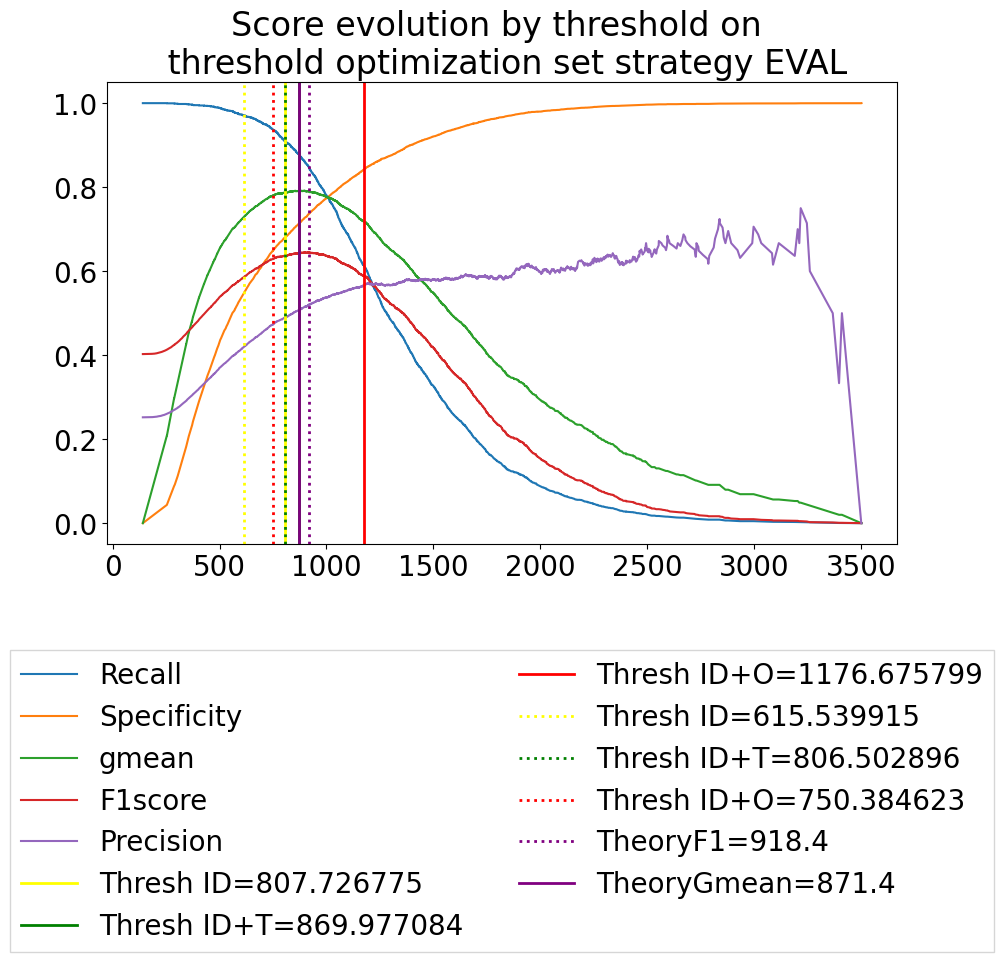

In [38]:
fpr, tpr, thresholds_roc = roc_curve(y_true_evaluation, -scores_evaluation)
gmean = np.sqrt(tpr * (1 - fpr))

precision, recall, thresholds_aupr = precision_recall_curve(y_true_evaluation, -scores_evaluation)

# Computing fbeta, handle case where tp = 0, leading to a null precision and null recall
f1_scores = np.zeros_like(precision)
nom = (1+beta**2)*recall*precision
denom = (recall+beta**2*precision)
np.divide(nom, denom, out=f1_scores, where=(denom != 0))

plt.plot(thresholds_roc, tpr, label='Recall')
plt.plot(thresholds_roc, 1-fpr, label='Specificity')
plt.plot(thresholds_roc, gmean, label='gmean')
plt.plot(thresholds_aupr, f1_scores[:-1], label='F1score')
plt.plot(thresholds_aupr, precision[:-1], label='Precision')


plt.axvline(threshOpt_optgmean_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optgmean_0), lw=2)
plt.axvline(threshOpt_optgmean_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optgmean_1), lw=2)
plt.axvline(threshOpt_optgmean_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optgmean_3), lw=2)

plt.axvline(threshOpt_optf1_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optf1_0),  ls='dotted', lw=2)
plt.axvline(threshOpt_optf1_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optf1_1),  ls='dotted', lw=2)
plt.axvline(threshOpt_optf1_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optf1_3),  ls='dotted', lw=2)


plt.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='TheoryF1=%.1f' %(threshCheatF1Eval), lw=2)
plt.axvline(threshCheatGmeanEval, color='purple', label='TheoryGmean=%.1f' %(threshCheatGmeanEval), lw=2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Score evolution by threshold on \n threshold optimization set strategy EVAL' )
plt.show()

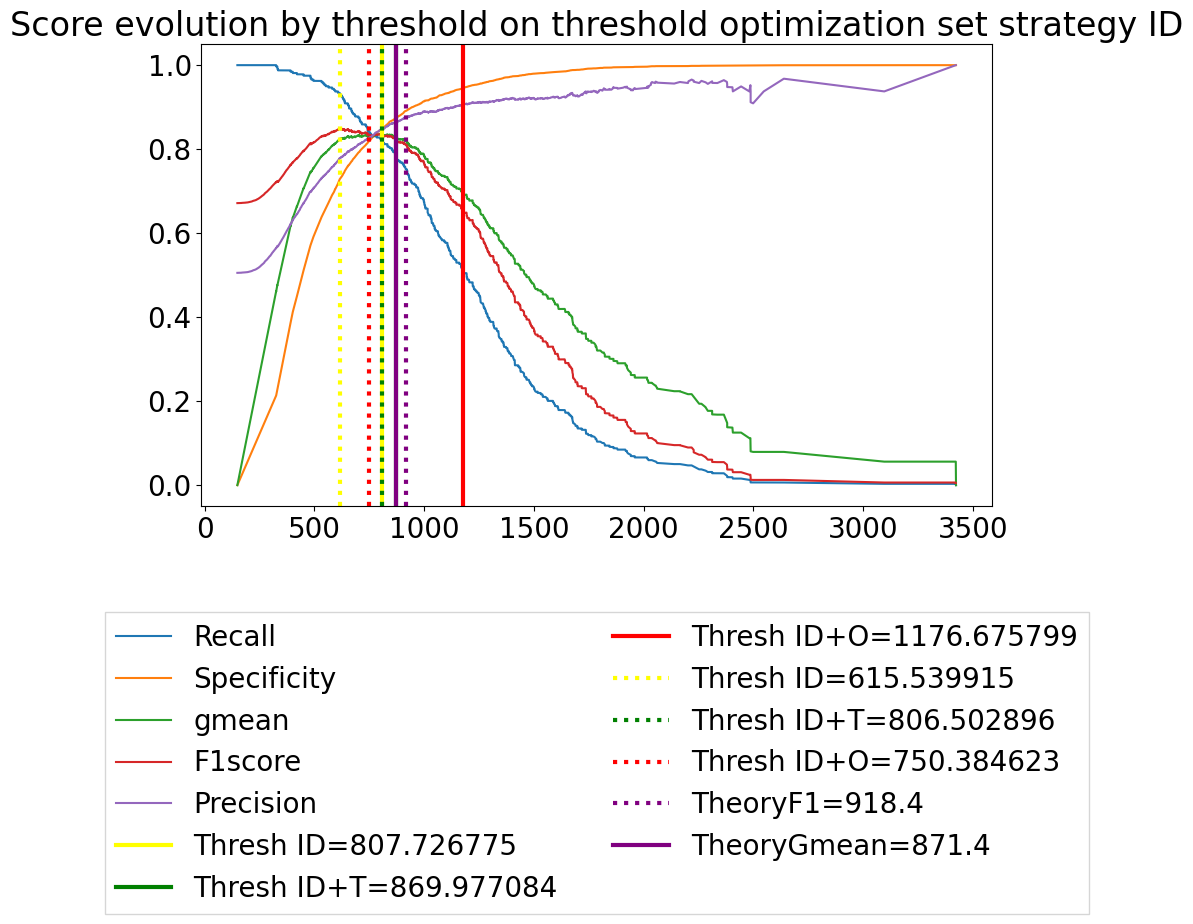

In [39]:
fpr, tpr, thresholds_roc = roc_curve(y_true_optimization_0, -scores_optimization_0)
gmean = np.sqrt(tpr * (1 - fpr))

precision, recall, thresholds_aupr = precision_recall_curve(y_true_optimization_0, -scores_optimization_0)

# Computing fbeta, handle case where tp = 0, leading to a null precision and null recall
f1_scores = np.zeros_like(precision)
nom = (1+beta**2)*recall*precision
denom = (recall+beta**2*precision)
np.divide(nom, denom, out=f1_scores, where=(denom != 0))

plt.plot(thresholds_roc, tpr, label='Recall')
plt.plot(thresholds_roc, 1-fpr, label='Specificity')
plt.plot(thresholds_roc, gmean, label='gmean')
plt.plot(thresholds_aupr, f1_scores[:-1], label='F1score')
plt.plot(thresholds_aupr, precision[:-1], label='Precision')


plt.axvline(threshOpt_optgmean_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optgmean_0), lw=3)
plt.axvline(threshOpt_optgmean_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optgmean_1), lw=3)
plt.axvline(threshOpt_optgmean_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optgmean_3), lw=3)
plt.axvline(threshOpt_optf1_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optf1_0),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optf1_1),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optf1_3),  ls='dotted', lw=3)


plt.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='TheoryF1=%.1f' %(threshCheatF1Eval), lw=3)
plt.axvline(threshCheatGmeanEval, color='purple', label='TheoryGmean=%.1f' %(threshCheatGmeanEval), lw=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Score evolution by threshold on threshold optimization set strategy ID' )
plt.show()

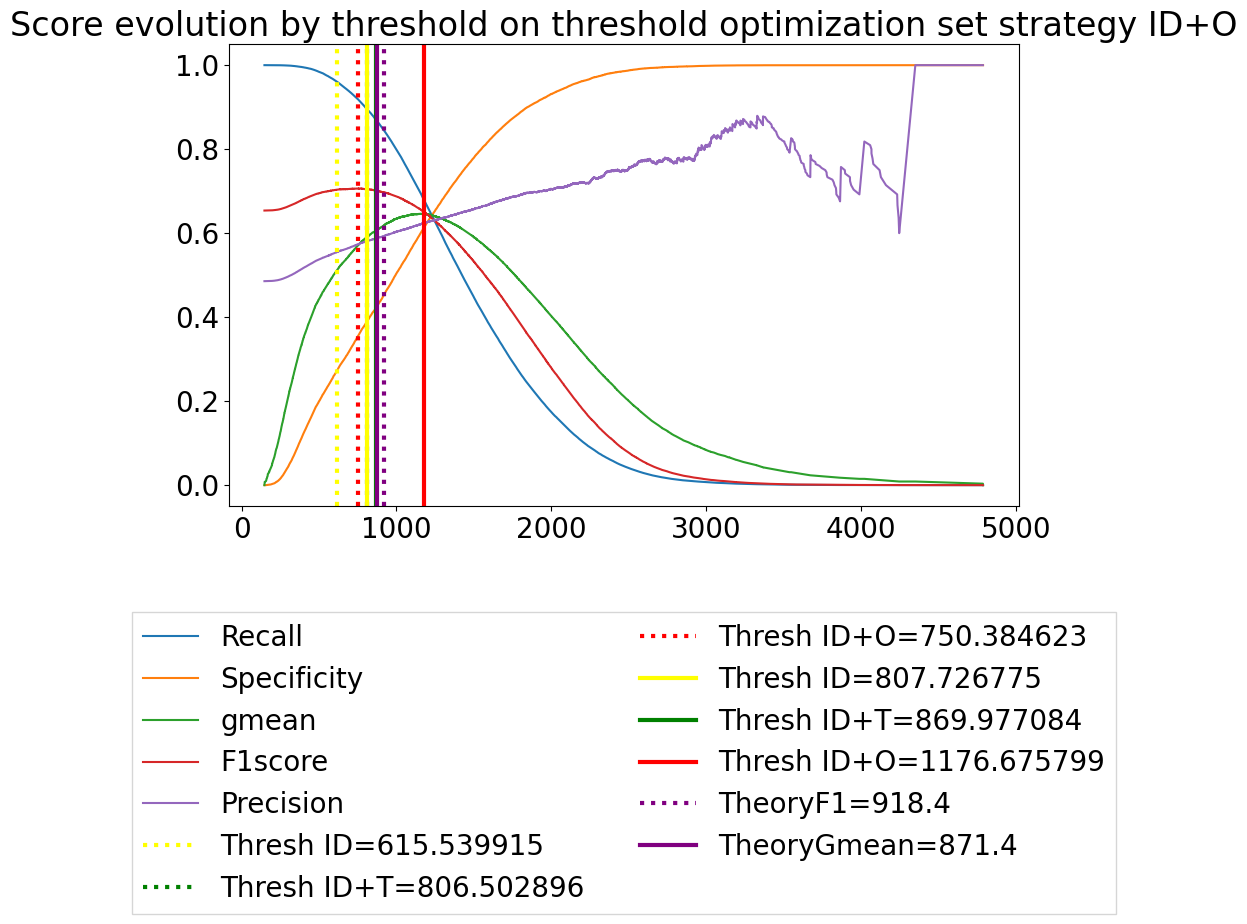

In [40]:
fpr, tpr, thresholds_roc = roc_curve(y_true_optimization_3, -scores_optimization_3)
gmean = np.sqrt(tpr * (1 - fpr))

precision, recall, thresholds_aupr = precision_recall_curve(y_true_optimization_3, -scores_optimization_3)

# Computing fbeta, handle case where tp = 0, leading to a null precision and null recall
f1_scores = np.zeros_like(precision)
nom = (1+beta**2)*recall*precision
denom = (recall+beta**2*precision)
np.divide(nom, denom, out=f1_scores, where=(denom != 0))

plt.plot(thresholds_roc, tpr, label='Recall')
plt.plot(thresholds_roc, 1-fpr, label='Specificity')
plt.plot(thresholds_roc, gmean, label='gmean')
plt.plot(thresholds_aupr, f1_scores[:-1], label='F1score')
plt.plot(thresholds_aupr, precision[:-1], label='Precision')


plt.axvline(threshOpt_optf1_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optf1_0),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optf1_1),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optf1_3),  ls='dotted', lw=3)

plt.axvline(threshOpt_optgmean_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optgmean_0), lw=3)
plt.axvline(threshOpt_optgmean_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optgmean_1), lw=3)
plt.axvline(threshOpt_optgmean_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optgmean_3), lw=3)

plt.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='TheoryF1=%.1f' %(threshCheatF1Eval), lw=3)
plt.axvline(threshCheatGmeanEval, color='purple', label='TheoryGmean=%.1f' %(threshCheatGmeanEval), lw=3)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Score evolution by threshold on threshold optimization set strategy ID+O' )
plt.show()

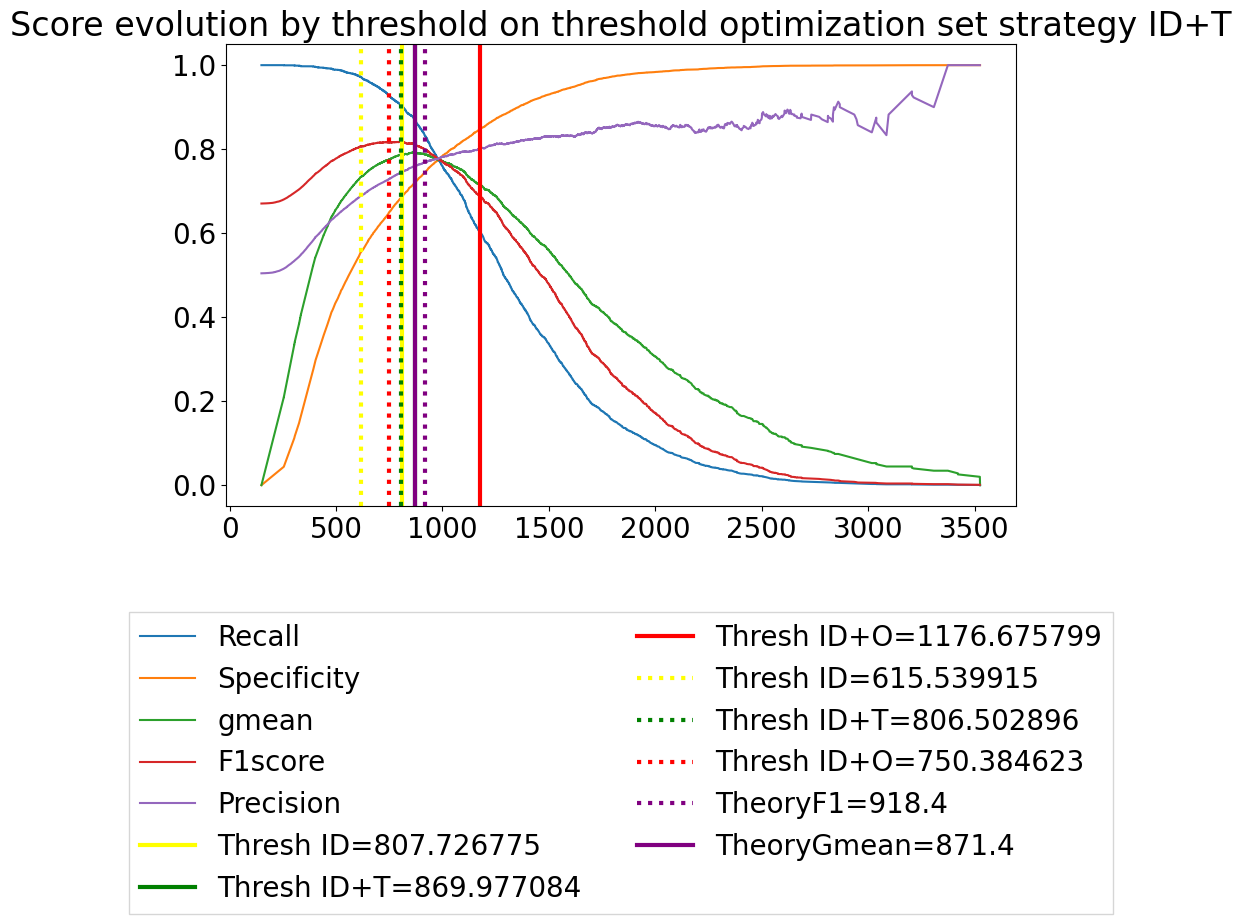

In [41]:
fpr, tpr, thresholds_roc = roc_curve(y_true_optimization_1, -scores_optimization_1)
gmean = np.sqrt(tpr * (1 - fpr))

precision, recall, thresholds_aupr = precision_recall_curve(y_true_optimization_1, -scores_optimization_1)

# Computing fbeta, handle case where tp = 0, leading to a null precision and null recall
f1_scores = np.zeros_like(precision)
nom = (1+beta**2)*recall*precision
denom = (recall+beta**2*precision)
np.divide(nom, denom, out=f1_scores, where=(denom != 0))

plt.plot(thresholds_roc, tpr, label='Recall')
plt.plot(thresholds_roc, 1-fpr, label='Specificity')
plt.plot(thresholds_roc, gmean, label='gmean')
plt.plot(thresholds_aupr, f1_scores[:-1], label='F1score')
plt.plot(thresholds_aupr, precision[:-1], label='Precision')


plt.axvline(threshOpt_optgmean_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optgmean_0), lw=3)
plt.axvline(threshOpt_optgmean_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optgmean_1), lw=3)
plt.axvline(threshOpt_optgmean_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optgmean_3), lw=3)
plt.axvline(threshOpt_optf1_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optf1_0),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optf1_1),  ls='dotted', lw=3)
plt.axvline(threshOpt_optf1_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optf1_3),  ls='dotted', lw=3)


plt.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='TheoryF1=%.1f' %(threshCheatF1Eval), lw=3)
plt.axvline(threshCheatGmeanEval, color='purple', label='TheoryGmean=%.1f' %(threshCheatGmeanEval), lw=3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Score evolution by threshold on threshold optimization set strategy ID+T' )
plt.show()

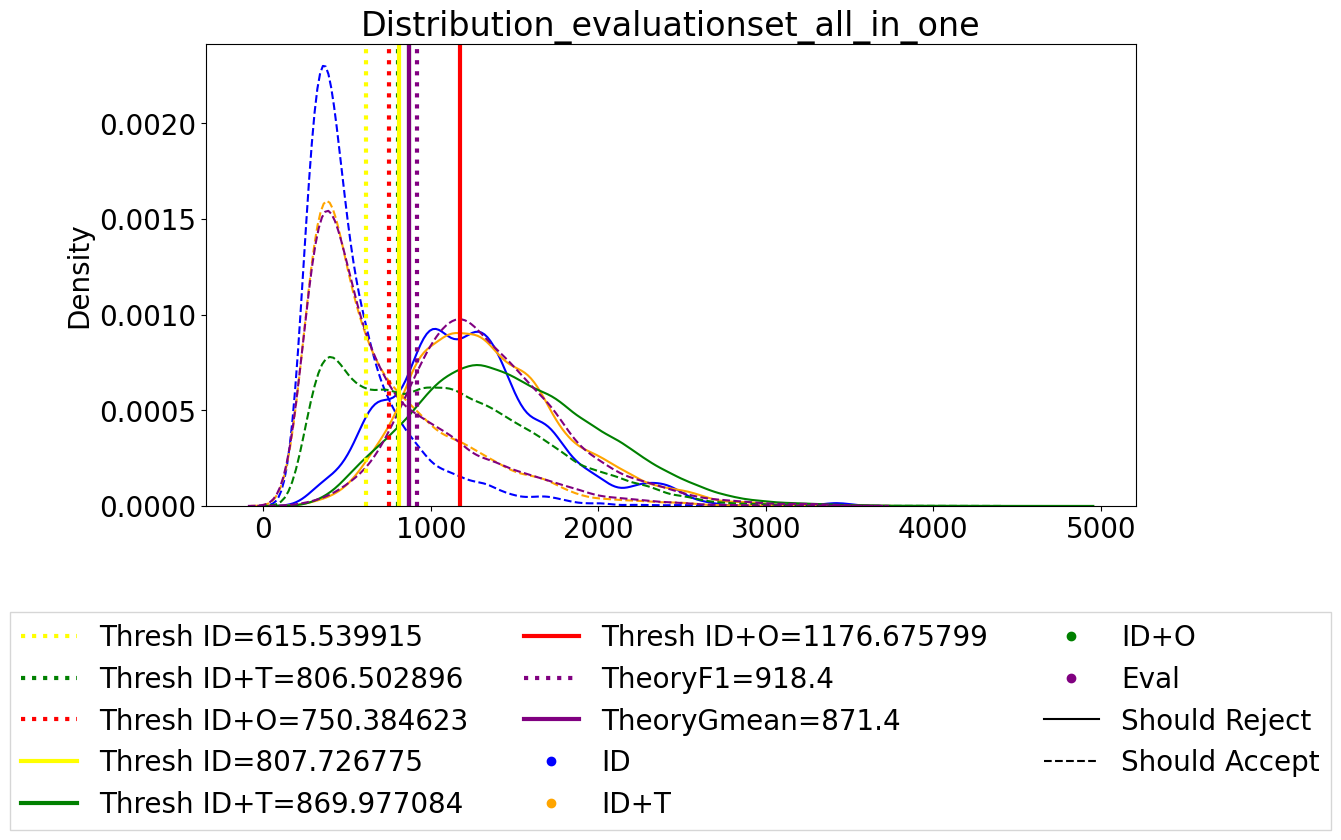

In [42]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

idx_groundtruth_reject_case0 = np.where(y_true_optimization_0==1)
idx_groundtruth_accept_case0 = np.where(y_true_optimization_0==0)
idx_groundtruth_reject_case1 = np.where(y_true_optimization_1==1)
idx_groundtruth_accept_case1 = np.where(y_true_optimization_1==0)
idx_groundtruth_reject_case2 = np.where(y_true_optimization_2==1)
idx_groundtruth_accept_case2 = np.where(y_true_optimization_2==0)
idx_groundtruth_reject_case3 = np.where(y_true_optimization_3==1)
idx_groundtruth_accept_case3 = np.where(y_true_optimization_3==0)
idx_groundtruth_reject_eval = np.where(y_true_evaluation==1)
idx_groundtruth_accept_eval = np.where(y_true_evaluation==0)


fig, ax = plt.subplots(figsize=[12, 6])


sns.kdeplot(-scores_optimization_0[idx_groundtruth_reject_case0], color='blue', ax=ax)
sns.kdeplot(-scores_optimization_0[idx_groundtruth_accept_case0], color='blue', ls='--', ax=ax)
sns.kdeplot(-scores_optimization_1[idx_groundtruth_reject_case1], color='orange', ax=ax)
sns.kdeplot(-scores_optimization_1[idx_groundtruth_accept_case1], color='orange', ls='--', ax=ax)
sns.kdeplot(-scores_optimization_3[idx_groundtruth_reject_case3], color='green', ax=ax)
sns.kdeplot(-scores_optimization_3[idx_groundtruth_accept_case3], color='green', ls='--', ax=ax)

sns.kdeplot(-scores_evaluation[idx_groundtruth_reject_eval], color='purple', ls='--', ax=ax)
sns.kdeplot(-scores_evaluation[idx_groundtruth_accept_eval], color='purple', ls='--', ax=ax)


ax.axvline(threshOpt_optf1_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optf1_0),  ls='dotted', lw=3)
ax.axvline(threshOpt_optf1_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optf1_1),  ls='dotted', lw=3)
ax.axvline(threshOpt_optf1_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optf1_3),  ls='dotted', lw=3)

ax.axvline(threshOpt_optgmean_0, color='yellow', label='Thresh ID=%.6f' %(threshOpt_optgmean_0), lw=3)
ax.axvline(threshOpt_optgmean_1, color='green', label='Thresh ID+T=%.6f' %(threshOpt_optgmean_1), lw=3)
ax.axvline(threshOpt_optgmean_3, color='red', label='Thresh ID+O=%.6f' %(threshOpt_optgmean_3), lw=3)

ax.axvline(threshCheatF1Eval, color='purple', ls='dotted', label='TheoryF1=%.1f' %(threshCheatF1Eval), lw=3)
ax.axvline(threshCheatGmeanEval, color='purple', label='TheoryGmean=%.1f' %(threshCheatGmeanEval), lw=3)

ax.plot([], [], 'o', color='blue', label='ID')
ax.plot([], [], 'o', color='orange', label='ID+T')
ax.plot([], [], 'o', color='green', label='ID+O')
ax.plot([], [], 'o', color='purple', label='Eval')

ax.plot([], [], '',  color='black', label='Should Reject')
ax.plot([], [], '', ls='--', color='black', label='Should Accept')


# ax.set_xlim(xmax= -0.3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=3)


plt.title('Distribution_evaluationset_all_in_one')

plt.show()


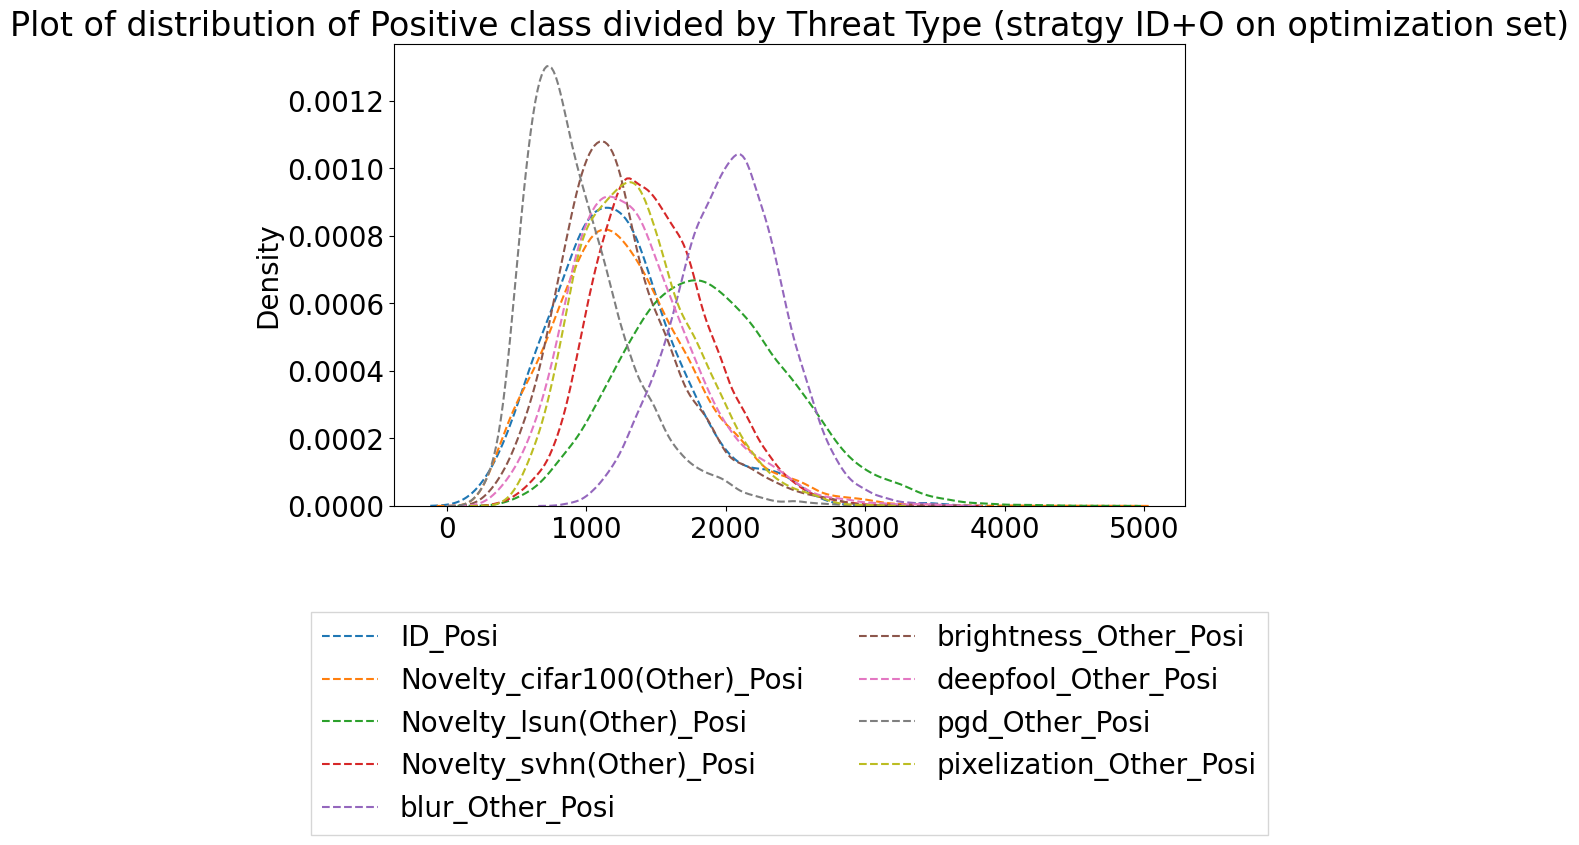

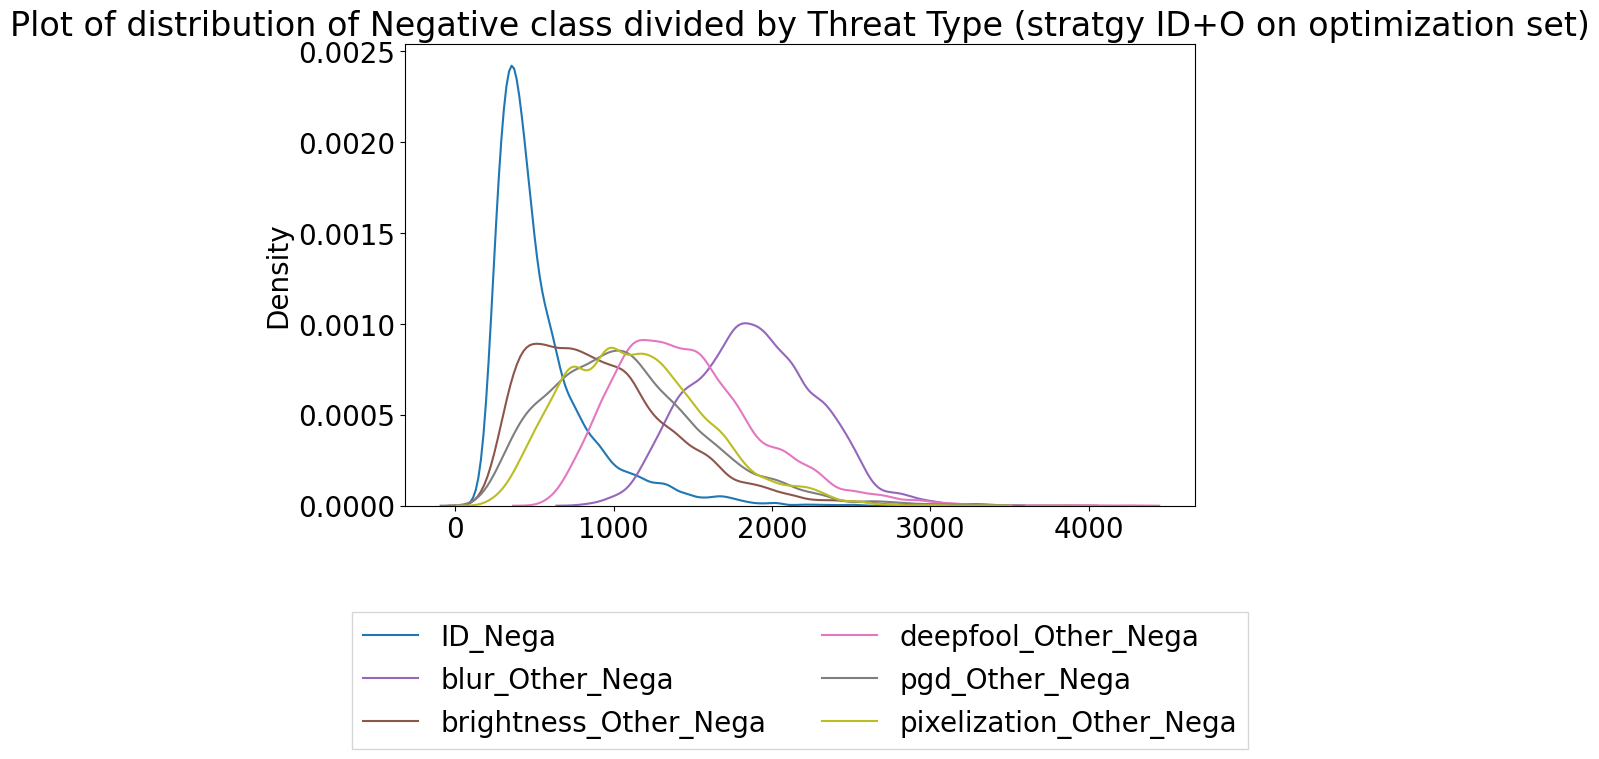

In [43]:
import colorcet as cc
palette = sns.color_palette(cc.glasbey, n_colors=10)

for OOD_type in np.unique(np.array((dataset_exp.flag_type_case3_optimization))):
    
    score_flag_OOD_posi = -scores_optimization_3[np.where((np.array((flag_type_optimization_3)) == OOD_type) & (y_true_optimization_3==1))]
    score_flag_OOD_nega = -scores_optimization_3[np.where((np.array((flag_type_optimization_3)) == OOD_type) & (y_true_optimization_3==0))]
    sns.kdeplot(score_flag_OOD_posi,
                 label=OOD_type+'_Posi', ls='--', palette=palette)
    
    

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Plot of distribution of Positive class divided by Threat Type (stratgy ID+O on optimization set)')
plt.show()

for OOD_type in np.unique(np.array((dataset_exp.flag_type_case3_optimization))):
    
    score_flag_OOD_posi = -scores_optimization_3[np.where((np.array((flag_type_optimization_3)) == OOD_type) & (y_true_optimization_3==1))]
    score_flag_OOD_nega = -scores_optimization_3[np.where((np.array((flag_type_optimization_3)) == OOD_type) & (y_true_optimization_3==0))]
    sns.kdeplot(score_flag_OOD_nega,
                 label=OOD_type+'_Nega', palette=palette)
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Plot of distribution of Negative class divided by Threat Type (stratgy ID+O on optimization set)')
plt.show()

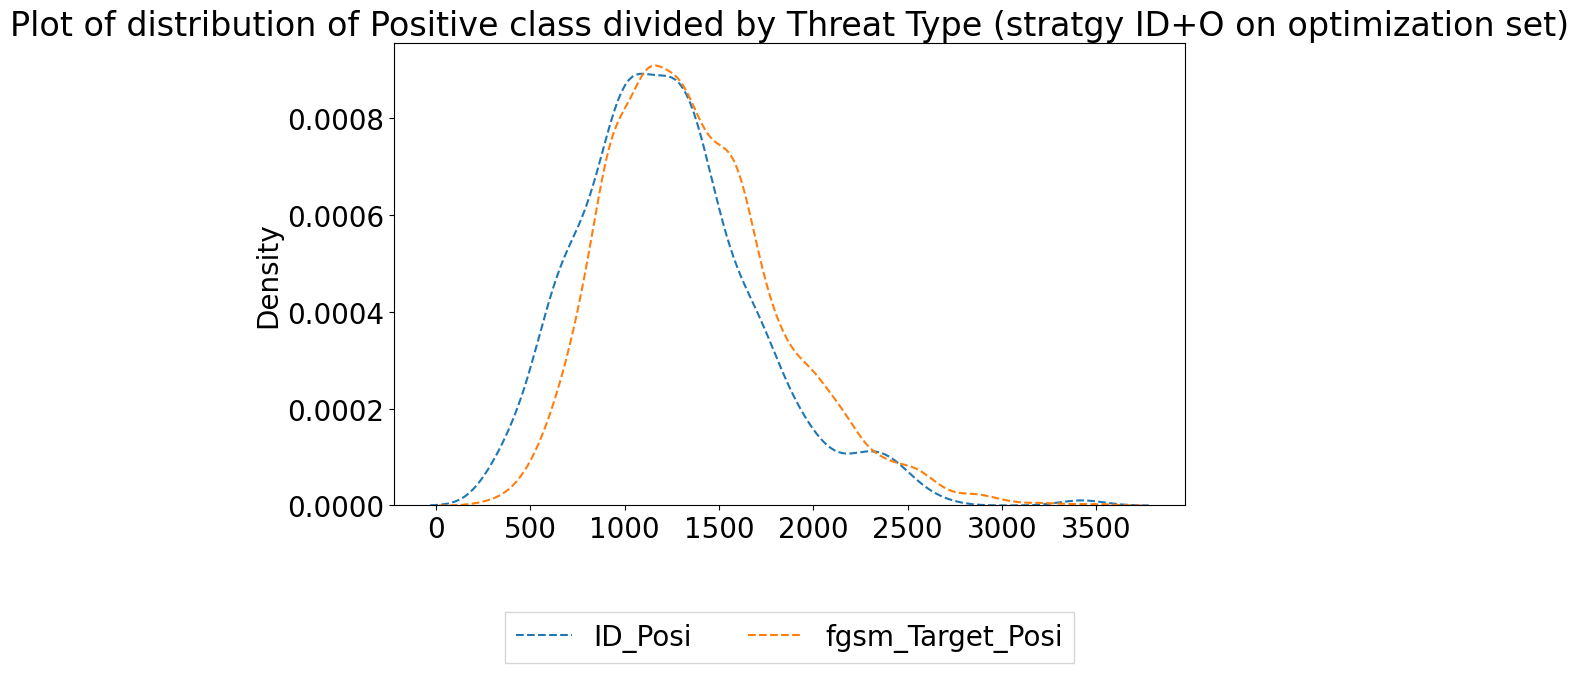

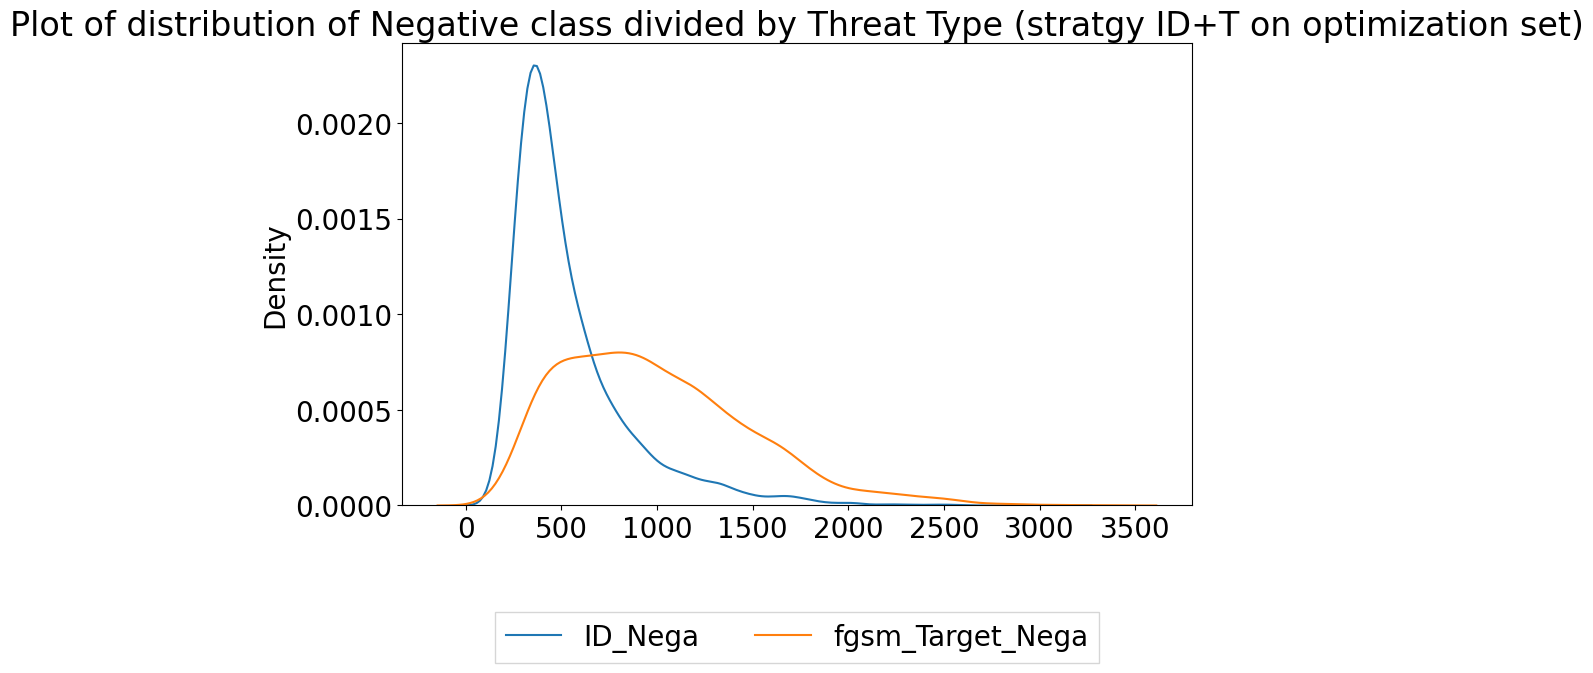

In [44]:
palette = sns.color_palette(cc.glasbey, n_colors=10)

for OOD_type in np.unique(np.array((dataset_exp.flag_type_case1_optimization))):
    
    score_flag_OOD_posi = -scores_optimization_1[np.where((np.array((flag_type_optimization_1)) == OOD_type) & (y_true_optimization_1==1))]
    score_flag_OOD_nega = -scores_optimization_1[np.where((np.array((flag_type_optimization_1)) == OOD_type) & (y_true_optimization_1==0))]
    sns.kdeplot(score_flag_OOD_posi,
                 label=OOD_type+'_Posi', ls='--', palette=palette)
    
    

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Plot of distribution of Positive class divided by Threat Type (stratgy ID+O on optimization set)')
plt.show()

for OOD_type in np.unique(np.array((dataset_exp.flag_type_case1_optimization))):
    
    score_flag_OOD_posi = -scores_optimization_1[np.where((np.array((flag_type_optimization_1)) == OOD_type) & (y_true_optimization_1==1))]
    score_flag_OOD_nega = -scores_optimization_1[np.where((np.array((flag_type_optimization_1)) == OOD_type) & (y_true_optimization_1==0))]
    sns.kdeplot(score_flag_OOD_nega,
                 label=OOD_type+'_Nega', palette=palette)
    
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=False, shadow=False, ncol=2)
plt.title('Plot of distribution of Negative class divided by Threat Type (stratgy ID+T on optimization set)')
plt.show()